#Credit card fraud detection

#Inicijalizacija i učitavanje podataka

Import potrebnih bibllioteka

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Učitavanje dataseta i prikaz 10 random vrijednosti

In [ ]:
data = pd.read_csv("creditcard.csv")
data.sample(10, random_state=123)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73129,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,50.00,0
229597,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,58.00,0
220218,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,198.00,0
198374,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,82.00,0
167980,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,93.75,0
98465,66672.0,-0.634719,0.592442,0.383238,0.570786,1.616970,4.631747,-0.789232,1.646998,0.251358,...,-0.333598,-0.807647,0.013052,1.000277,-0.131596,-0.449776,0.093359,0.090260,24.63,0
200436,133435.0,-3.089446,-2.515804,1.205023,-1.767681,0.594350,-1.130869,-1.008283,0.744072,-1.272679,...,0.384737,-0.229528,0.080999,-0.416668,0.496685,-0.402766,0.131159,-0.326898,167.56,0
113404,73053.0,-2.274617,-2.735528,1.119531,-0.923586,1.489864,-2.101549,-0.772237,0.150989,-1.269018,...,-0.027092,-0.592477,0.639344,0.305030,-0.069783,0.881338,-0.118591,0.154070,144.99,0
149063,90536.0,-0.114786,1.091362,-0.507040,-0.549498,0.964686,-0.385480,0.606305,0.103705,1.509189,...,-0.515381,-1.156256,0.090066,0.125590,-0.457510,0.085614,0.288228,0.119023,3.96,0
41420,40674.0,-0.246513,0.861245,1.890563,1.373825,0.172463,0.001762,0.606328,-0.124765,-0.510219,...,0.027795,0.298056,-0.186672,0.067153,-0.168904,-0.185869,-0.004944,-0.102743,11.01,0


Analiza distribucije klasa

fraudulent (1)

non-fraudulent (0)

Osnovne informacije o veličini skupa (broj redova i kolona), ukupna količina memorije koju dataset zauzima i iskorištena memorija

In [ ]:
file_path = 'creditcard.csv'
file_size = os.path.getsize(file_path) / (1024 * 1024)
print(f"Veličina datoteke: {file_size:.2f} MB")
print(f"Broj redova i kolona u dataset-u: {data.shape}")
print(f"Iskorištena memorija: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Veličina datoteke: 143.84 MB
Broj redova i kolona u dataset-u: (284807, 31)
Iskorištena memorija: 67.36 MB


Prikaz broja i postotnog udjela svake klase u ciljnoj koloni Class

In [ ]:
class_distribution = data['Class'].value_counts()

In [ ]:
print(class_distribution)

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
print(f"Non-Fraud (0): {class_distribution[0]:,} ({class_distribution[0]/len(data)*100:.2f}%)")
print(f"Fraud (1): {class_distribution[1]:,} ({class_distribution[1]/len(data)*100:.2f}%)")

Non-Fraud (0): 284,315 (99.83%)
Fraud (1): 492 (0.17%)


Provjera da li u skupu podataka postoje nedostajuće vrijednosti, duplikati te koji su sve tipovi podataka prisutni. Ove informacije su važne za eventualno čišćenje skupa i pripremu podataka za dalju obradu.

In [ ]:
print(f"Broj nedostajućih vrijednosti: \n{data.isnull().sum().sum()}")
print(f"Broj duplikata: {data.duplicated().sum()}")
print(f"Tipovi podataka:\n{data.dtypes.value_counts()}")

print(f"\nRaspodjela klasa")
class_dist = data['Class'].value_counts()
print(f"Non-Fraud (0): {class_dist[0]:,} ({class_dist[0]/len(data)*100:.2f}%)")
print(f"Fraud (1): {class_dist[1]:,} ({class_dist[1]/len(data)*100:.2f}%)")

Broj nedostajućih vrijednosti: 
0
Broj duplikata: 1081
Tipovi podataka:
float64    30
int64       1
Name: count, dtype: int64

Raspodjela klasa
Non-Fraud (0): 284,315 (99.83%)
Fraud (1): 492 (0.17%)


#Čišćenje podataka

Prikaz kolona i redova koji posjeduju NaN vrijednosti

In [ ]:
columns_with_nan = (data.isna().sum() > 0).sum()
print(f"Broj kolona koje sadrže NaN vrijednosti: {columns_with_nan}")

Broj kolona koje sadrže NaN vrijednosti: 0


Dataset je sadržavao 1081 duplikat koji su uklonjeni radi očuvanja kvalitete podataka i tačnosti modela.

In [ ]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print(f"Obrisan je: {before - after} red sa NaN vrijednostima.")

Obrisan je: 1081 red sa NaN vrijednostima.


#Prikaz osnovnih informacija o datasetu

U nastavku su prikazane osnovne informacije o očišćenom skupu podataka, uključujući tipove i broj vrijednosti po kolonama, kao i prvih pet redova radi kratkog uvida u strukturu i sadržaj. Također je izvršen statistički pregled numeričkih kolona koji obuhvata srednje vrijednosti, standardne devijacije, minimume i maksimume. Provjerena je i prisutnost nedostajućih podataka, kao i broj jedinstvenih vrijednosti.

In [ ]:
print(" Osnovne informacije o očišćenom skupu:")
print("-" * 50)
print(data.info())
print("\n Prvih 5 redova:")
print(data.head())

 Osnovne informacije o očišćenom skupu:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  

In [ ]:
print("Statistički pregled:")
print(data.describe().T)

Statistički pregled:
           count          mean           std         min           25%  \
Time    283726.0  94811.077600  47481.047891    0.000000  54204.750000   
V1      283726.0      0.005917      1.948026  -56.407510     -0.915951   
V2      283726.0     -0.004135      1.646703  -72.715728     -0.600321   
V3      283726.0      0.001613      1.508682  -48.325589     -0.889682   
V4      283726.0     -0.002966      1.414184   -5.683171     -0.850134   
V5      283726.0      0.001828      1.377008 -113.743307     -0.689830   
V6      283726.0     -0.001139      1.331931  -26.160506     -0.769031   
V7      283726.0      0.001801      1.227664  -43.557242     -0.552509   
V8      283726.0     -0.000854      1.179054  -73.216718     -0.208828   
V9      283726.0     -0.001596      1.095492  -13.434066     -0.644221   
V10     283726.0     -0.001441      1.076407  -24.588262     -0.535578   
V11     283726.0      0.000202      1.018720   -4.797473     -0.761649   
V12     283726.0 

In [ ]:
print("Provjera nedostajućih vrijednosti po kolonama:")
print(data.isnull().sum())

Provjera nedostajućih vrijednosti po kolonama:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print("Broj jedinstvenih vrijednosti po koloni:")
print(data.nunique())

Broj jedinstvenih vrijednosti po koloni:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


#Vizualizacija podataka

Distribucija numeričkih atributa (histogrami):


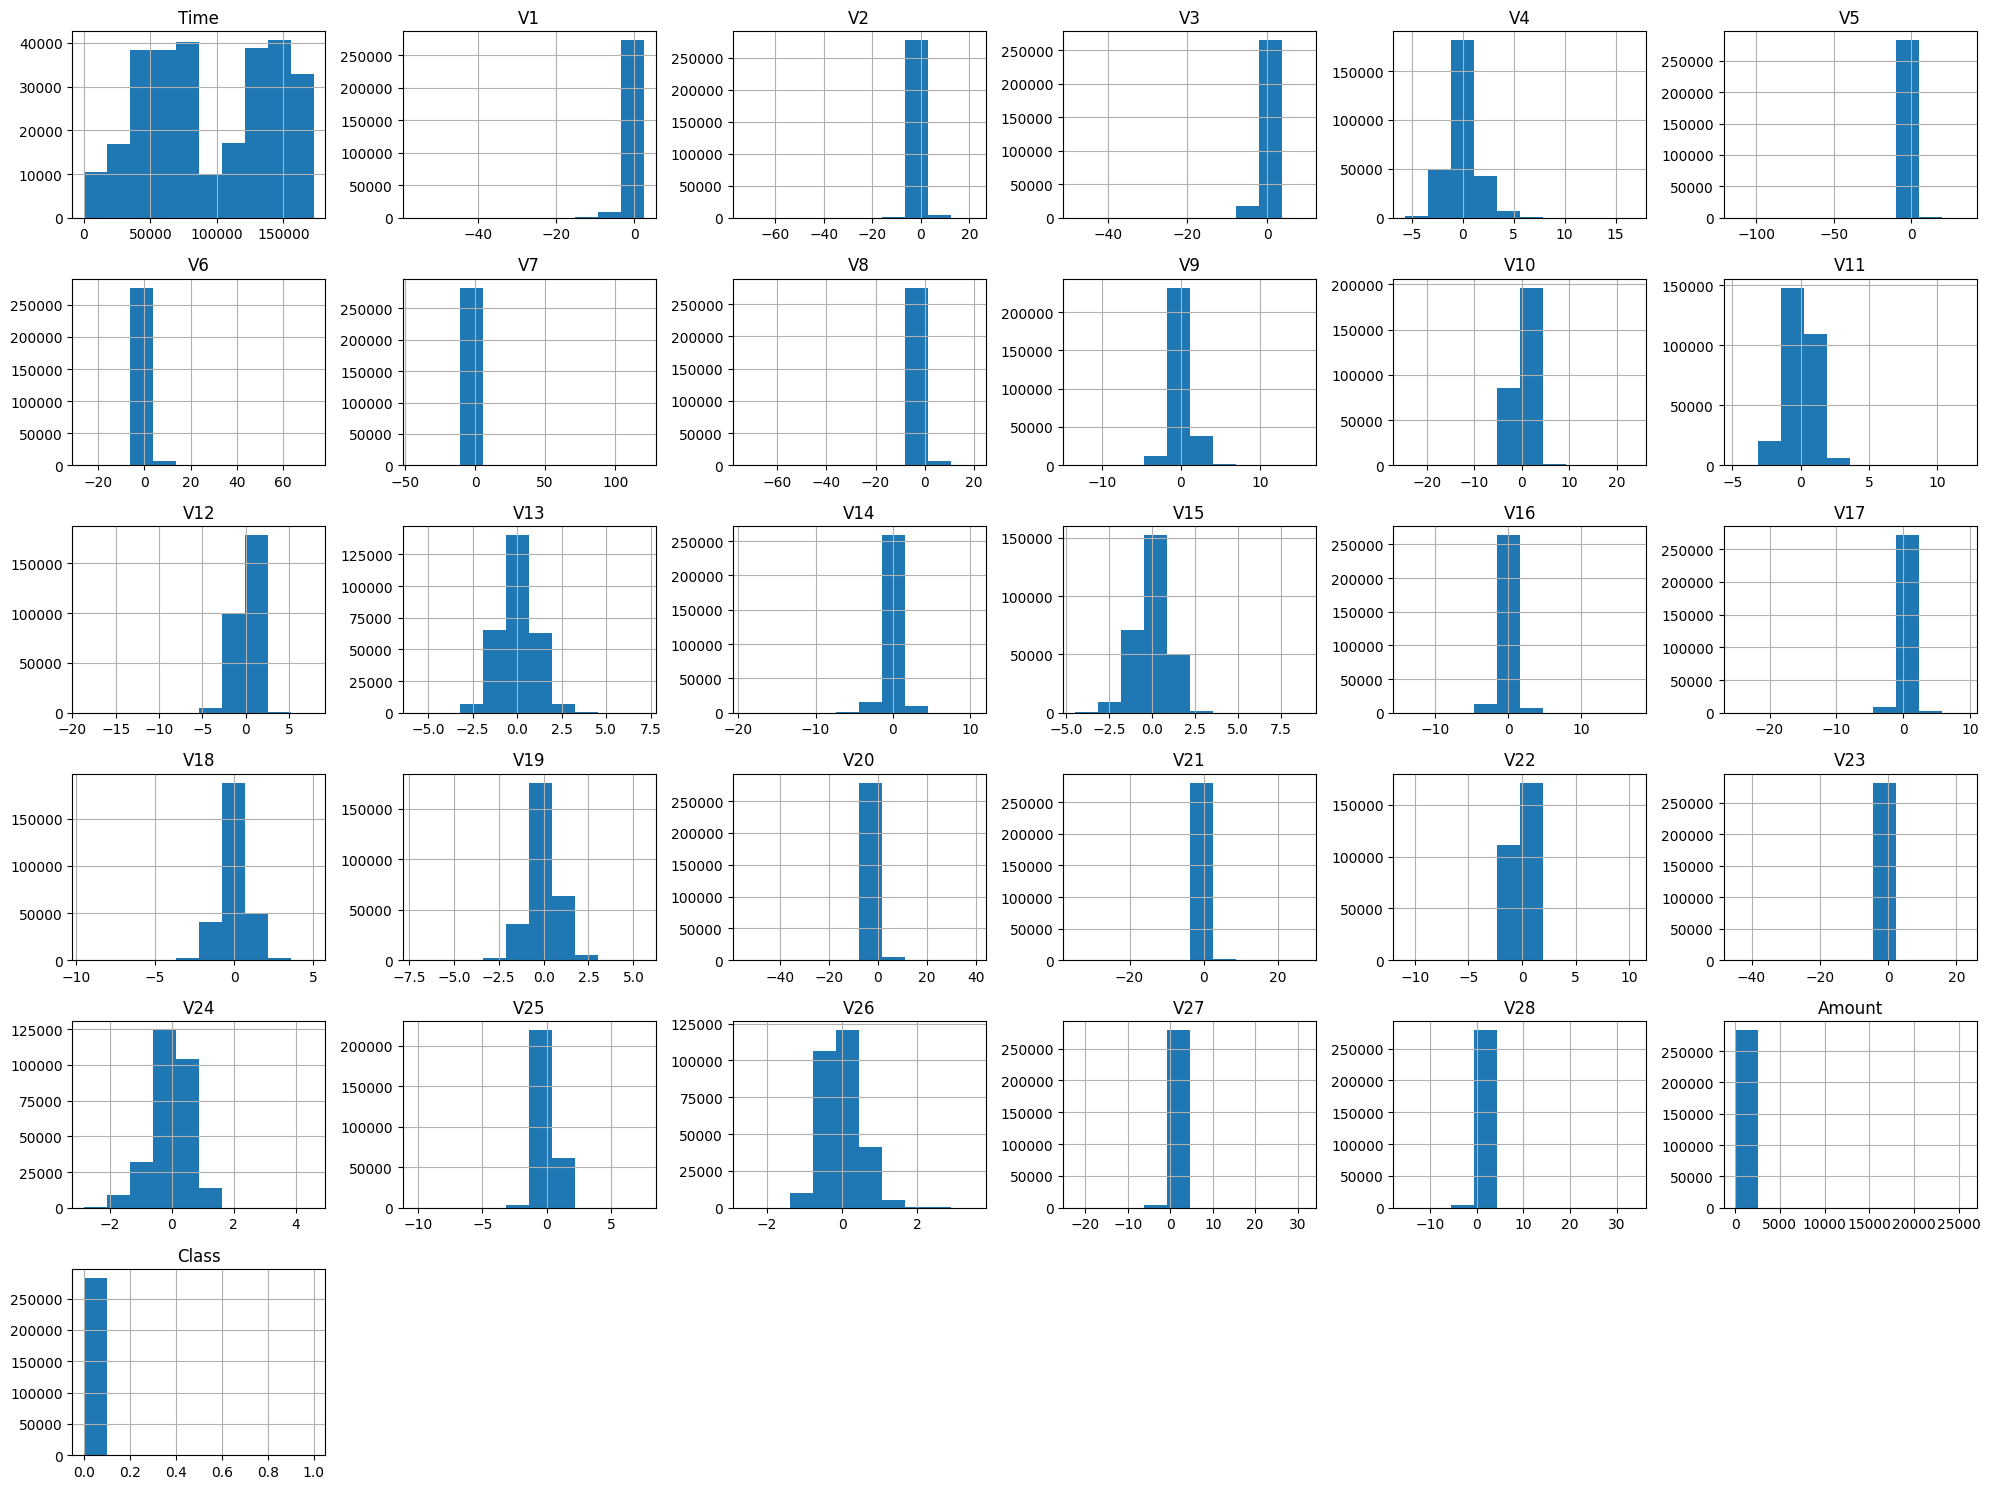

In [ ]:
print("Distribucija numeričkih atributa (histogrami):")
data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

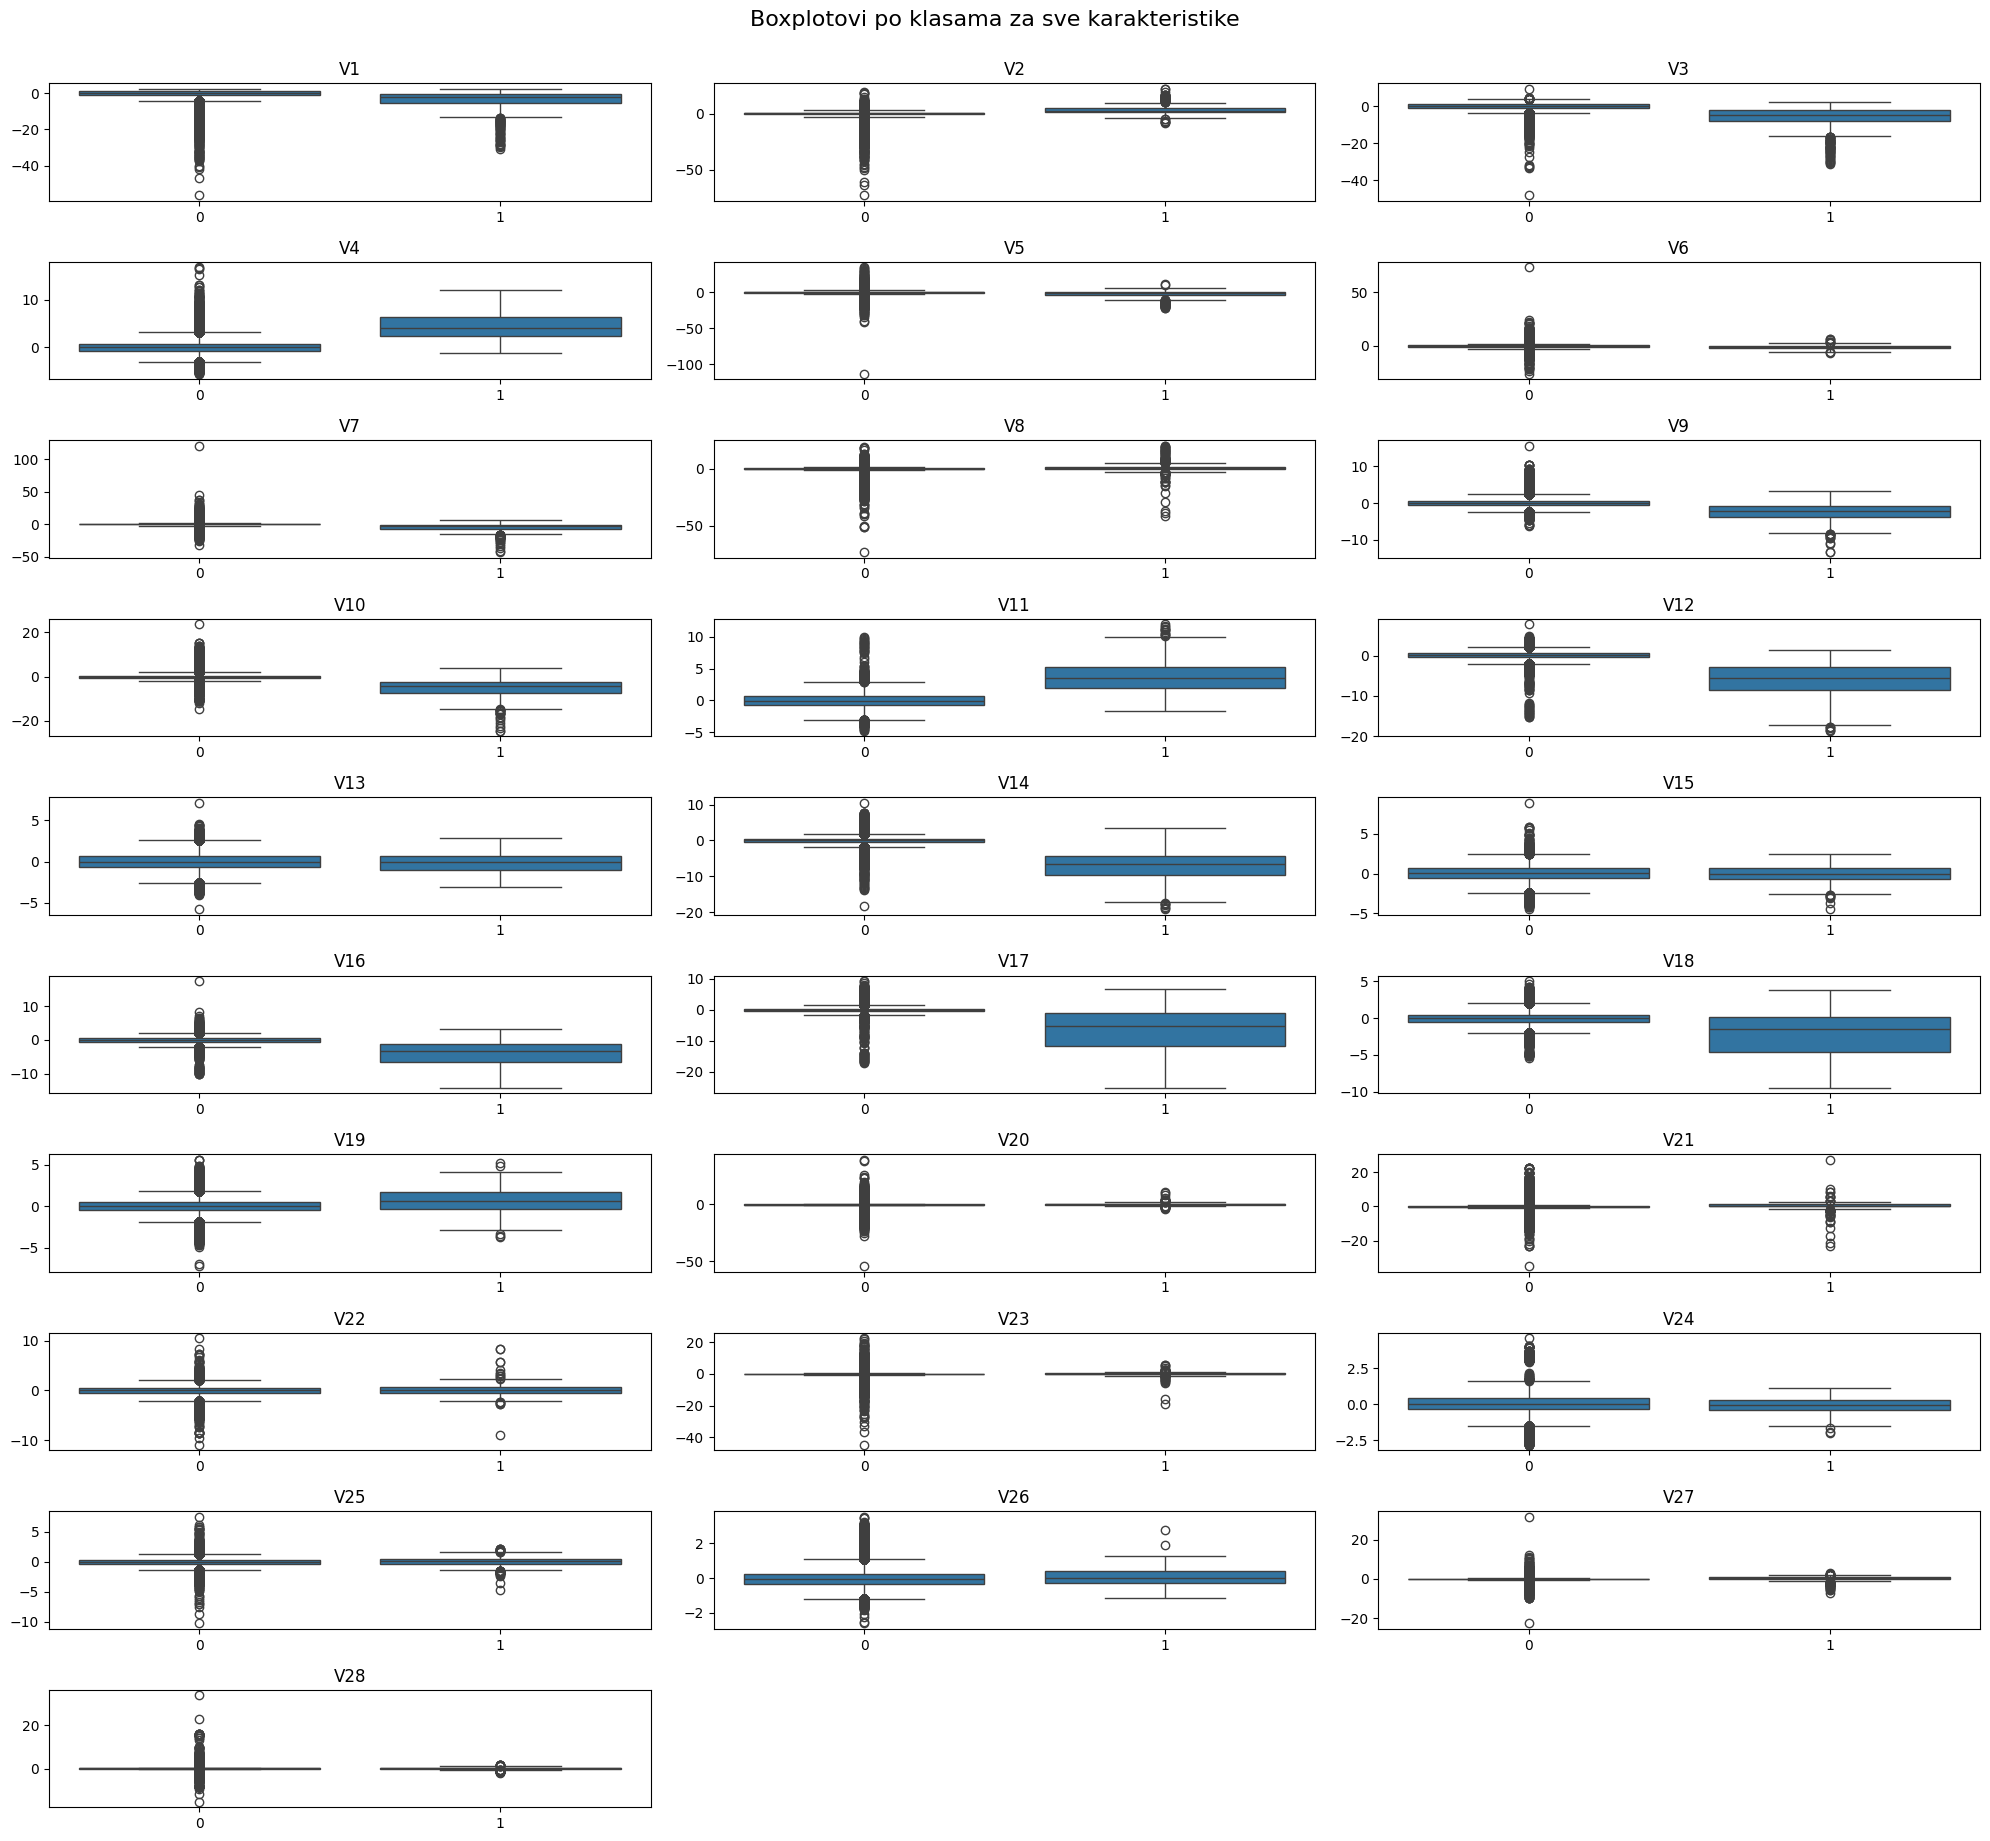

In [ ]:
features = [col for col in data.columns if col not in ['Class', 'Time', 'Amount', 'id']]
plt.figure(figsize=(20, 18))
for i, feature in enumerate(features):
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Boxplotovi po klasama za sve karakteristike', fontsize=16, y=1.02)
plt.show()

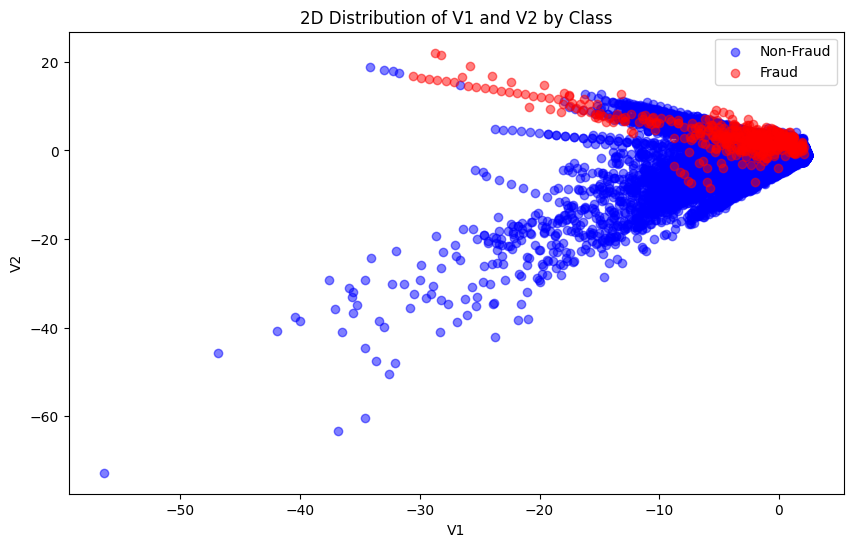

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Class'] == 0]['V1'], data[data['Class'] == 0]['V2'], label='Non-Fraud', alpha=0.5, c='blue')
plt.scatter(data[data['Class'] == 1]['V1'], data[data['Class'] == 1]['V2'], label='Fraud', alpha=0.5, c='red')
plt.title('2D Distribution of V1 and V2 by Class')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(loc='upper right')
plt.show()

Korelacija između numeričkih varijabli (heatmap):


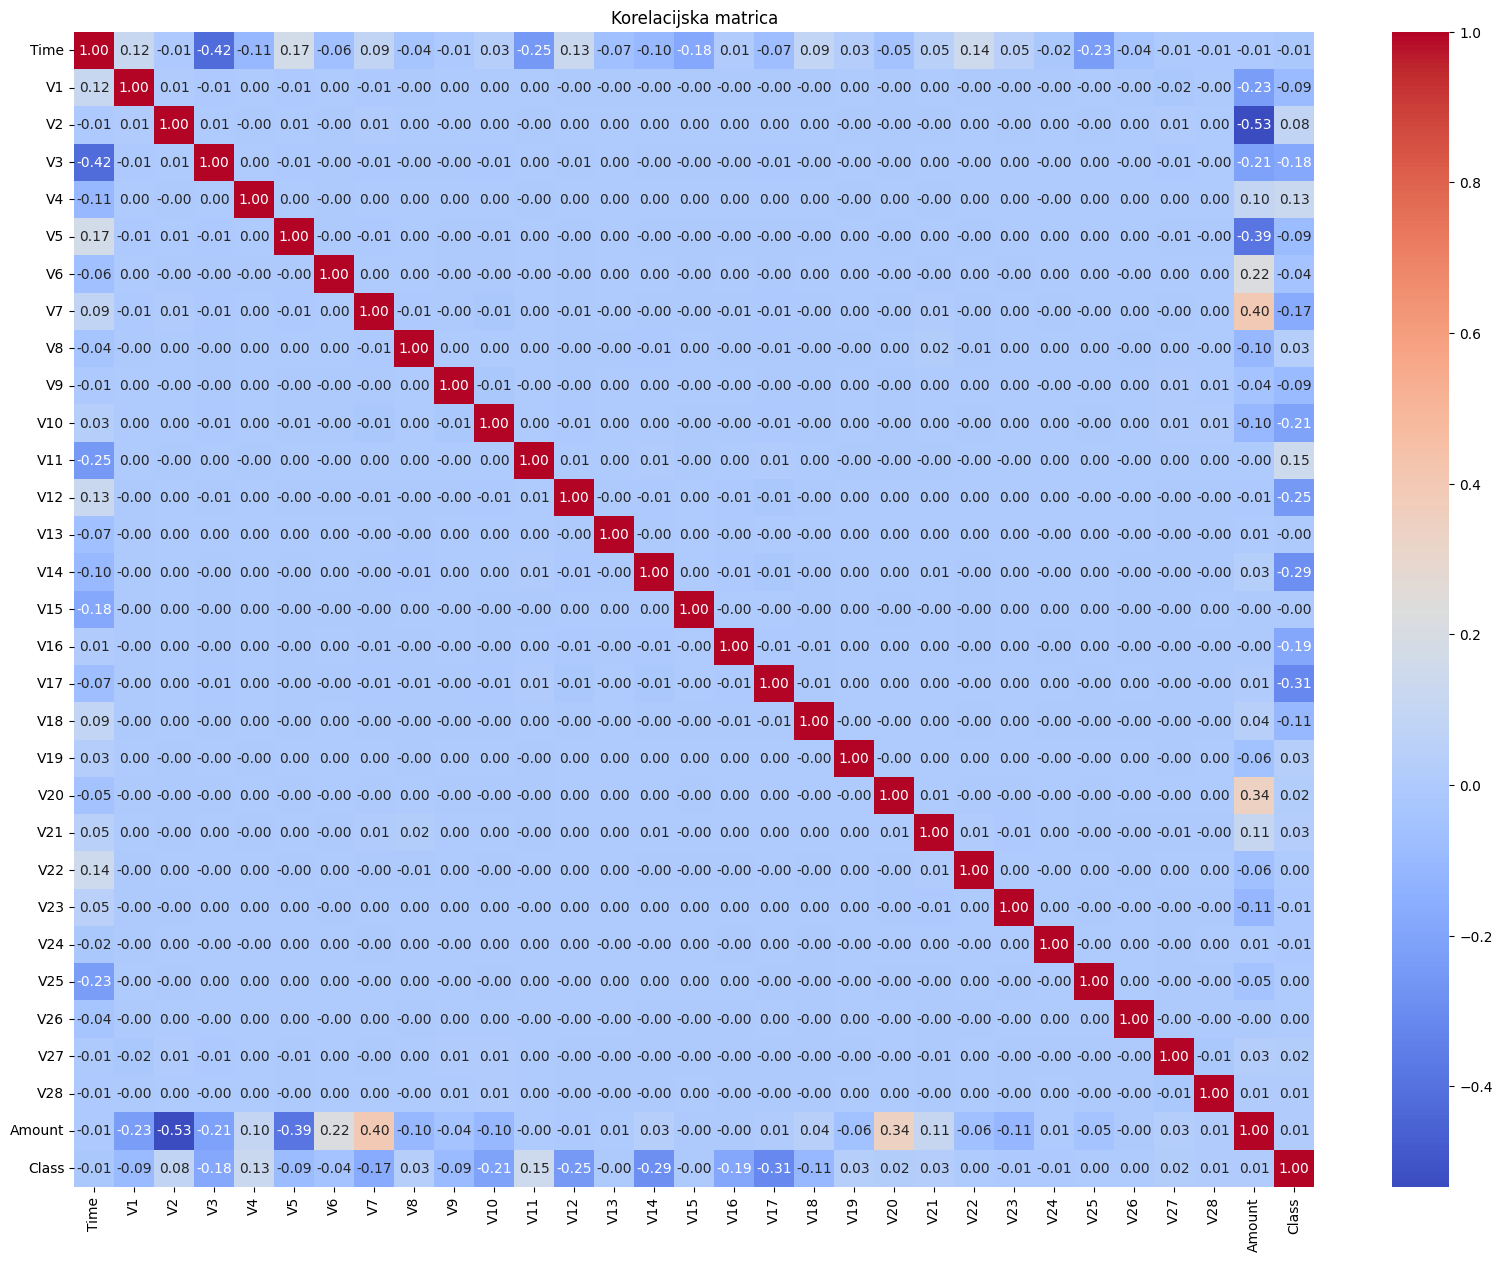

In [ ]:
print("Korelacija između numeričkih varijabli (heatmap):")
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelacijska matrica")
plt.show()

#Binarna klasifikacija

Zbog velike neuravnotežnosti među klasama, urađeno je treniranje modela na skupu podataka koji nije balansiran, te na balansiranom trening skupu podataka - undersampling i oversempling

Priprema podataka

Skaliranje svih numeričkih kolona osim id i class

In [ ]:
numeric_cols = [col for col in data.columns if col not in ['id', 'Class']]
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

Podjela podataka na trening i test skup

trening skup -> 80%

test skup -> 20%

In [ ]:
X = data[numeric_cols]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Broj instanci u trening i test skupu

In [ ]:
print(f"Broj instanci u trening skupu: {X_train.shape[0]}")
print(f"Broj instanci u test skupu: {X_test.shape[0]}")

Broj instanci u trening skupu: 226980
Broj instanci u test skupu: 56746


# 1. Nebalansirani skup podataka

Kod nekih modela korišten je koristen je class_weight, kako bi se modeli više fokusirali na klasu 1 fraud koja je rjeđa

Kod ovih modela u slučaju greške za klasu 1 (fraud) model se "kažnjava" 5 puta više u odnosu na slučajeve kada se pogrešno klasificira klasa 0 (non-fraud)

In [ ]:
X_train1 = X_train
X_test1 = X_test
y_train1 = y_train
y_test1 = y_test

1.1. Random forest

Random Forest (nebalansiran skup)
Accuracy: 0.9995
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.99      0.72      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



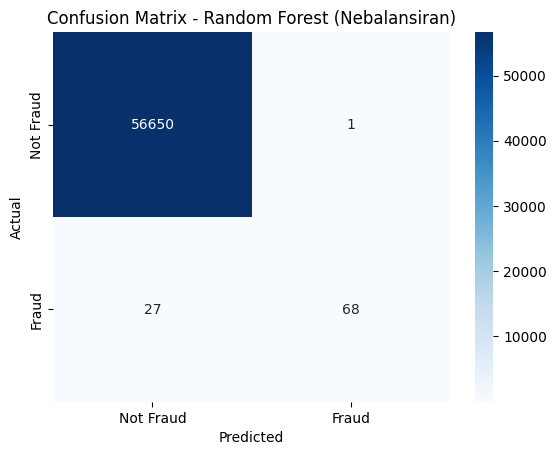

In [ ]:
rf1 = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 5})
rf1.fit(X_train1, y_train1)
y_pred_rf1 = rf1.predict(X_test1)

acc_rf1 = accuracy_score(y_test1, y_pred_rf1)
print("Random Forest (nebalansiran skup)")
print(f'Accuracy: {acc_rf1:.4f}')
print(classification_report(y_test1, y_pred_rf1, target_names=['Not Fraud', 'Fraud']))

cm1 = confusion_matrix(y_test1, y_pred_rf1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Random Forest (Nebalansiran)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.2. Logistic Regression

Logistic Regression (nebalansiran skup)
Accuracy: 0.9993
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.83      0.73      0.78        95

    accuracy                           1.00     56746
   macro avg       0.92      0.86      0.89     56746
weighted avg       1.00      1.00      1.00     56746



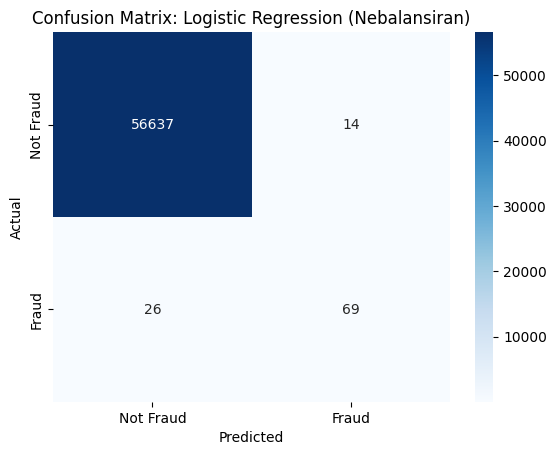

In [ ]:
lr1 = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 5})
lr1.fit(X_train1, y_train1)
y_pred_lr1 = lr1.predict(X_test1)

acc_lr1 = accuracy_score(y_test1, y_pred_lr1)
print("Logistic Regression (nebalansiran skup)")
print(f'Accuracy: {acc_lr1:.4f}')
print(classification_report(y_test1, y_pred_lr1, target_names=['Not Fraud', 'Fraud']))

cm = confusion_matrix(y_test1, y_pred_lr1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix: Logistic Regression (Nebalansiran)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1.3. XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:45:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (nebalansiran skup)
Accuracy: 0.9995
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.95      0.75      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



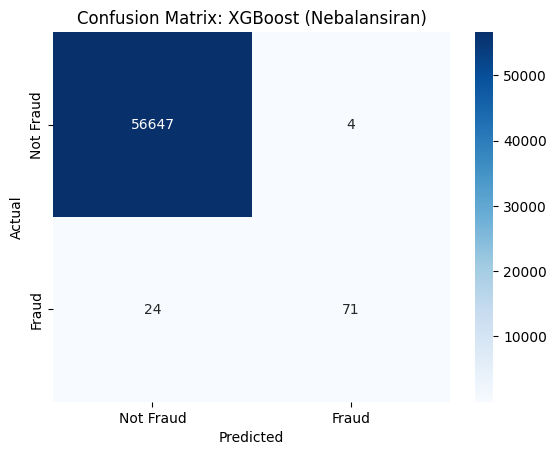

In [ ]:
xgb1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=5, random_state=42)
xgb1.fit(X_train1, y_train1)
y_pred_xgb1 = xgb1.predict(X_test1)

acc_xgb1 = accuracy_score(y_test1, y_pred_xgb1)
print("XGBoost (nebalansiran skup)")
print(f'Accuracy: {acc_xgb1:.4f}')
print(classification_report(y_test1, y_pred_xgb1, target_names=['Not Fraud', 'Fraud']))

cm1 = confusion_matrix(y_test1, y_pred_xgb1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix: XGBoost (Nebalansiran)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.4.1. KNN, n = 3

KNN, k=3 (nebalansiran skup)
Accuracy: 0.9995
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.95      0.74      0.83        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



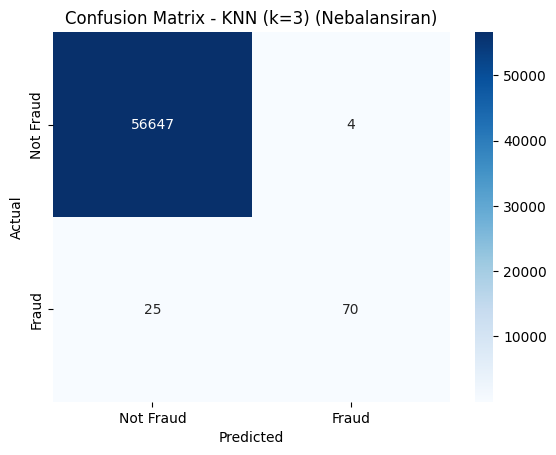

In [ ]:
knn1_3 = KNeighborsClassifier(n_neighbors=3)
knn1_3.fit(X_train1, y_train1)
y_pred_knn1_3 = knn1_3.predict(X_test1)

acc_knn1_3 = accuracy_score(y_test1, y_pred_knn1_3)
print("KNN, k=3 (nebalansiran skup)")
print(f"Accuracy: {acc_knn1_3:.4f}")
print(classification_report(y_test1, y_pred_knn1_3, target_names=['Not Fraud', 'Fraud']))

cm1_3 = confusion_matrix(y_test1, y_pred_knn1_3)
sns.heatmap(cm1_3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=3) (Nebalansiran)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.4.2. KNN, n = 5

KNN, k=5 (nebalansiran skup)
Accuracy: 0.9995
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.96      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



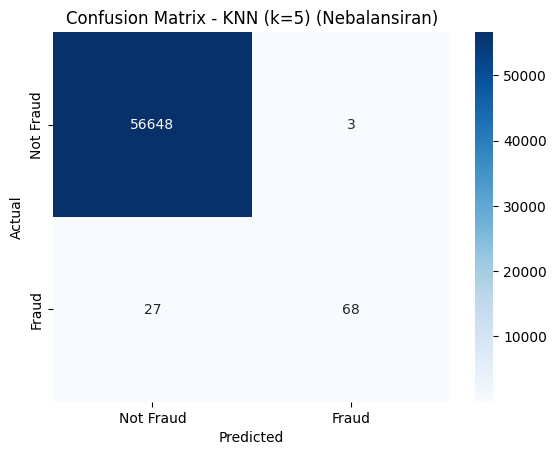

In [ ]:
knn1_5 = KNeighborsClassifier(n_neighbors=5)
knn1_5.fit(X_train1, y_train1)
y_pred_knn1_5 = knn1_5.predict(X_test1)

acc_knn1_5 = accuracy_score(y_test1, y_pred_knn1_5)
print("KNN, k=5 (nebalansiran skup)")
print(f"Accuracy: {acc_knn1_5:.4f}")
print(classification_report(y_test1, y_pred_knn1_5, target_names=['Not Fraud', 'Fraud']))

cm1_5 = confusion_matrix(y_test1, y_pred_knn1_5)
sns.heatmap(cm1_5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=5) (Nebalansiran)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.4.3. KNN, n = 7

KNN, k=7 (nebalansiran skup)
Accuracy: 0.9994
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.94      0.69      0.80        95

    accuracy                           1.00     56746
   macro avg       0.97      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



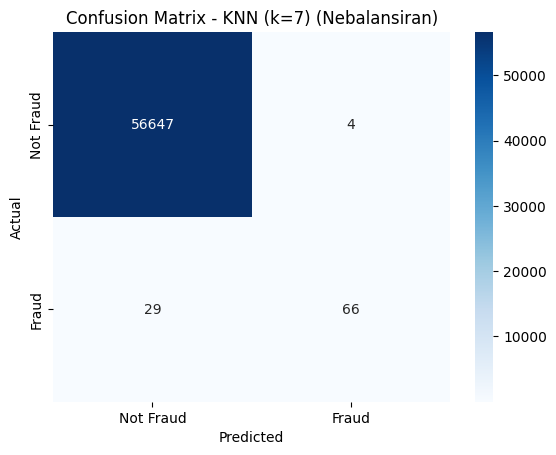

In [ ]:
knn1_7 = KNeighborsClassifier(n_neighbors=7)
knn1_7.fit(X_train1, y_train1)
y_pred_knn1_7 = knn1_7.predict(X_test1)

acc_knn1_7 = accuracy_score(y_test1, y_pred_knn1_7)
print("KNN, k=7 (nebalansiran skup)")
print(f"Accuracy: {acc_knn1_7:.4f}")
print(classification_report(y_test1, y_pred_knn1_7, target_names=['Not Fraud', 'Fraud']))

cm1_7 = confusion_matrix(y_test1, y_pred_knn1_7)
sns.heatmap(cm1_7, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=7) (Nebalansiran)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.5. Decision Tree

Decision Tree (nebalansiran skup)
Accuracy: 0.9991
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.76      0.69      0.73        95

    accuracy                           1.00     56746
   macro avg       0.88      0.85      0.86     56746
weighted avg       1.00      1.00      1.00     56746



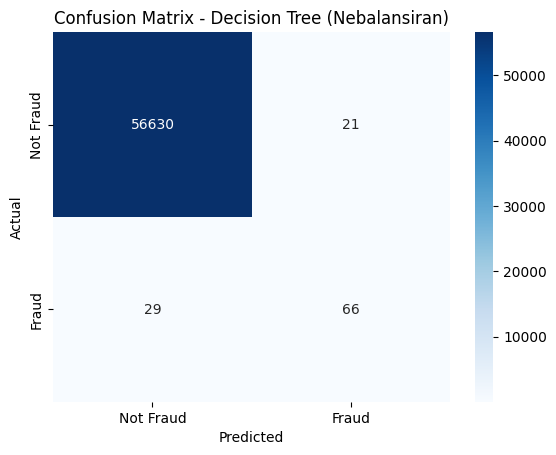

In [ ]:
dt1 = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 5})
dt1.fit(X_train1, y_train1)
y_pred_dt1 = dt1.predict(X_test1)

acc_dt1 = accuracy_score(y_test1, y_pred_dt1)
print("Decision Tree (nebalansiran skup)")
print(f"Accuracy: {acc_dt1:.4f}")
print(classification_report(y_test1, y_pred_dt1, target_names=['Not Fraud', 'Fraud']))

cm1 = confusion_matrix(y_test1, y_pred_dt1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Decision Tree (Nebalansiran)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.6. MLP

MLP (nebalansiran skup)
Accuracy: 0.9991
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.82      0.58      0.68        95

    accuracy                           1.00     56746
   macro avg       0.91      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746



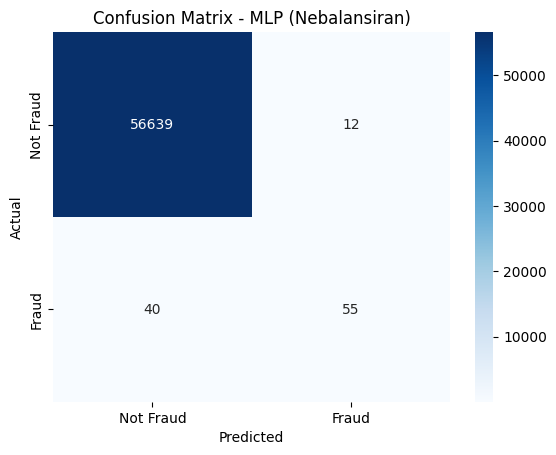

In [ ]:
mlp1 = MLPClassifier(random_state=42, max_iter=1000)
mlp1.fit(X_train1, y_train1)
y_pred_mlp1 = mlp1.predict(X_test1)

acc_mlp1 = accuracy_score(y_test1, y_pred_mlp1)
print("MLP (nebalansiran skup)")
print(f"Accuracy: {acc_mlp1:.4f}")
print(classification_report(y_test1, y_pred_mlp1, target_names=['Not Fraud', 'Fraud']))

cm1 = confusion_matrix(y_test1, y_pred_mlp1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - MLP (Nebalansiran)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.7. SVM

SVM (nebalansiran skup)
Accuracy: 0.9994
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.87      0.76      0.81        95

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.90     56746
weighted avg       1.00      1.00      1.00     56746



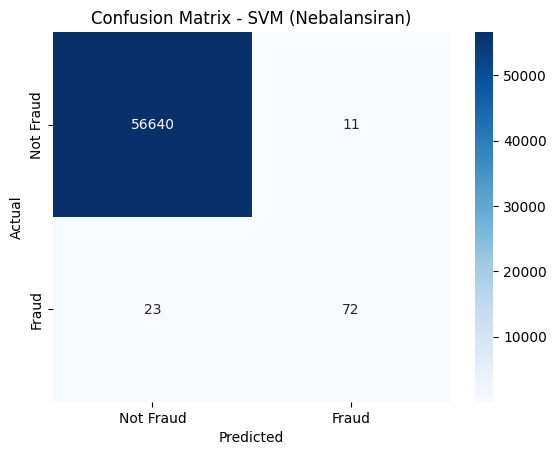

In [ ]:
svm1 = SVC(random_state=42, class_weight={0: 1, 1: 5})
svm1.fit(X_train1, y_train1)
y_pred_svm1 = svm1.predict(X_test1)

acc_svm1 = accuracy_score(y_test1, y_pred_svm1)
print("SVM (nebalansiran skup)")
print(f"Accuracy: {acc_svm1:.4f}")
print(classification_report(y_test1, y_pred_svm1, target_names=['Not Fraud', 'Fraud']))

cm1 = confusion_matrix(y_test1, y_pred_svm1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - SVM (Nebalansiran)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.8. Naive Bayes

Umjesto da koristimo uobičajenu metodu predict() koja klasifikuje uzorke koristeći standardni prag 0.5 za vjerovatnoću, mi smo koristili predict_proba() da dobijemo vjerovatnoće da je svaki uzorak klase 1 (fraud).

Zatim smo prilagodili prag za donošenje odluke da bude niži (npr. 0.3 umjesto 0.5). To znači da ćemo označiti kao "fraud" svaki uzorak koji ima vjerovatnoću klase 1 veću ili jednaku 0.3.

Time smo modelu efektivno dali veću "kaznu" za propust (lažno negativne) — jer je lakše da uzorak bude klasifikovan kao fraud, što može pomoći smanjiti broj slučajeva kad model previdi stvarni fraud.

Naive Bayes (nebalansiran skup)
Accuracy: 0.9770
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56651
       Fraud       0.06      0.81      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.89      0.55     56746
weighted avg       1.00      0.98      0.99     56746



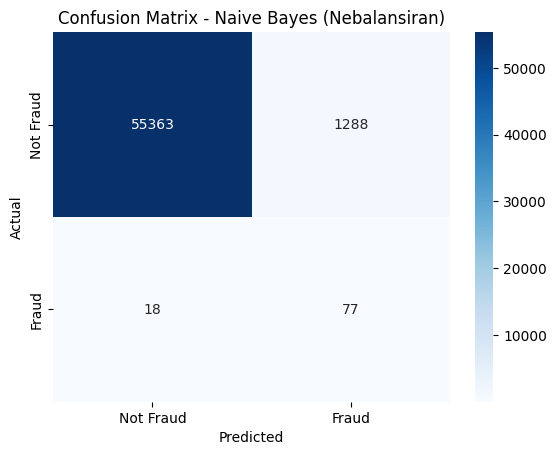

In [ ]:
threshold = 0.3

nb1 = GaussianNB()
nb1.fit(X_train1, y_train1)
y_proba_nb1 = nb1.predict_proba(X_test1)[:, 1]
y_pred_nb1 = (y_proba_nb1 >= threshold).astype(int)

acc_nb1 = accuracy_score(y_test1, y_pred_nb1)
print("Naive Bayes (nebalansiran skup)")
print(f"Accuracy: {acc_nb1:.4f}")
print(classification_report(y_test1, y_pred_nb1, target_names=['Not Fraud', 'Fraud']))

cm1 = confusion_matrix(y_test1, y_pred_nb1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Naive Bayes (Nebalansiran)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.9. Keras model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras model (nebalansiran skup)
Accuracy: 0.9994
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.88      0.76      0.81        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



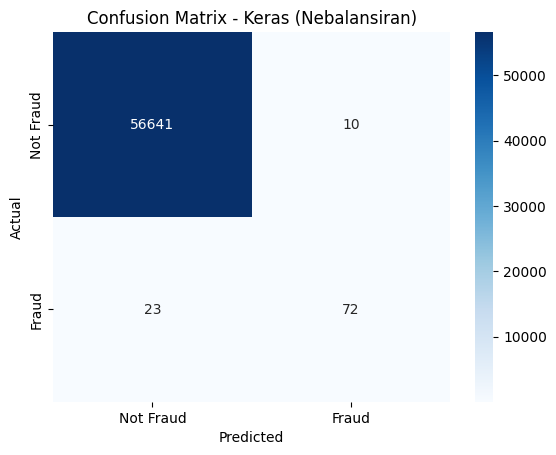

In [ ]:
keras1 = Sequential()
keras1.add(Dense(32, activation='relu', input_shape=(X_train1.shape[1],)))
keras1.add(Dense(16, activation='relu'))
keras1.add(Dense(1, activation='sigmoid'))

class_weight = {0: 1, 1: 5}

keras1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
keras1.fit(X_train1, y_train1, epochs=10, batch_size=32, verbose=0, class_weight=class_weight)

loss1, acc_keras1 = keras1.evaluate(X_test1, y_test1, verbose=0)
print("Keras model (nebalansiran skup)")
print(f"Accuracy: {acc_keras1:.4f}")
y_proba_keras1 = keras1.predict(X_test1)
y_pred_keras1 = (y_proba_keras1 >= 0.5).astype(int).flatten()
print(classification_report(y_test1, y_pred_keras1, target_names=['Not Fraud', 'Fraud']))
cm1 = confusion_matrix(y_test1, y_pred_keras1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Keras (Nebalansiran)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Poređenje modela za nebalansirani skup podataka

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    fraud_label = '1' if '1' in report else list(report.keys())[-2]

    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (1)': report.get(fraud_label, {}).get('precision', 0),
        'Recall (1)': report.get(fraud_label, {}).get('recall', 0),
        'F1-score (1)': report.get(fraud_label, {}).get('f1-score', 0)
    }


In [ ]:
results_neb = [
    get_metrics(y_test1, y_pred_rf1, 'Random Forest'),
    get_metrics(y_test1, y_pred_lr1, 'Logistic Regression'),
    get_metrics(y_test1, y_pred_xgb1, 'XGBoost'),
    get_metrics(y_test1, y_pred_knn1_3, 'KNN (k=3)'),
    get_metrics(y_test1, y_pred_knn1_5, 'KNN (k=5)'),
    get_metrics(y_test1, y_pred_knn1_7, 'KNN (k=7)'),
    get_metrics(y_test1, y_pred_dt1, 'Decision Tree'),
    get_metrics(y_test1, y_pred_mlp1, 'MLP'),
    get_metrics(y_test1, y_pred_svm1, 'SVM'),
    get_metrics(y_test1, y_pred_nb1, 'Naive Bayes'),
    get_metrics(y_test1, y_pred_keras1, 'Keras'),
]

data_neb = pd.DataFrame(results_neb)
print("Poređenje modela: Nebalansirani skup")
print(data_neb.sort_values(by='F1-score (1)', ascending=False))

Poređenje modela: Nebalansirani skup
                  Model  Accuracy  Precision (1)  Recall (1)  F1-score (1)
2               XGBoost  0.999507       0.946667    0.747368      0.835294
0         Random Forest  0.999507       0.985507    0.715789      0.829268
3             KNN (k=3)  0.999489       0.945946    0.736842      0.828402
4             KNN (k=5)  0.999471       0.957746    0.715789      0.819277
10                Keras  0.999418       0.878049    0.757895      0.813559
8                   SVM  0.999401       0.867470    0.757895      0.808989
5             KNN (k=7)  0.999418       0.942857    0.694737      0.800000
1   Logistic Regression  0.999295       0.831325    0.726316      0.775281
6         Decision Tree  0.999119       0.758621    0.694737      0.725275
7                   MLP  0.999084       0.820896    0.578947      0.679012
9           Naive Bayes  0.976985       0.056410    0.810526      0.105479


Histogram performansi

/tmp/ipython-input-38-1124577713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_neb, x='Accuracy', y='Model', palette='crest')


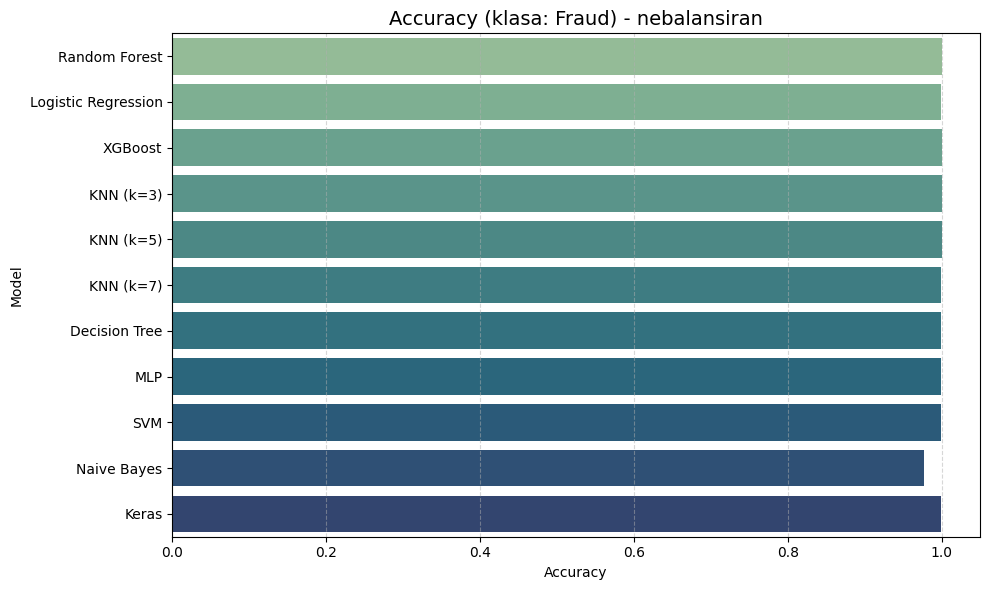

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_neb, x='Accuracy', y='Model', palette='crest')

plt.title('Accuracy (klasa: Fraud) - nebalansiran', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-39-378987551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_neb, x='Precision (1)', y='Model', palette='crest')


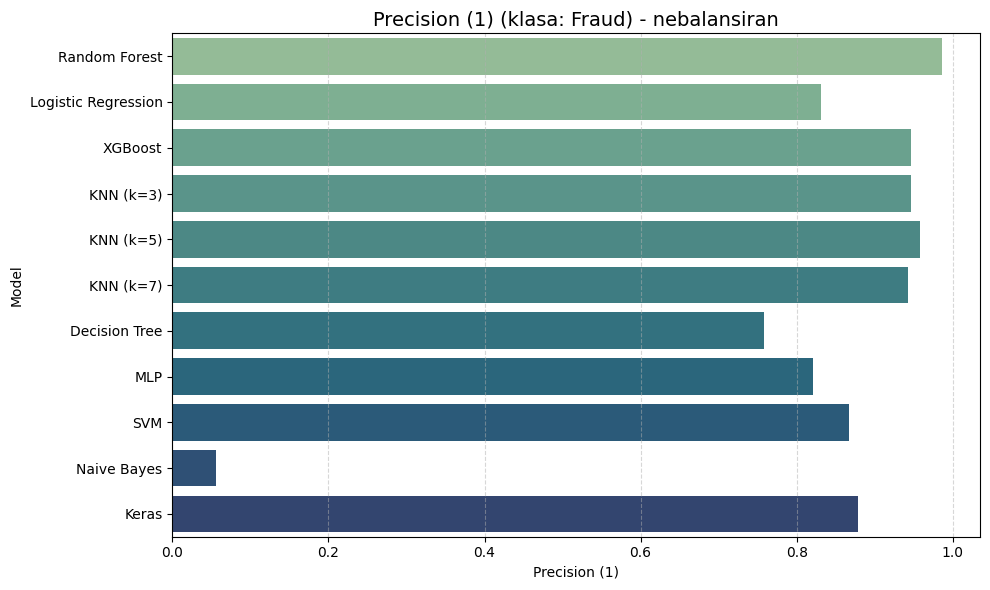

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_neb, x='Precision (1)', y='Model', palette='crest')

plt.title('Precision (1) (klasa: Fraud) - nebalansiran', fontsize=14)
plt.xlabel('Precision (1)')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-41-517586476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_neb, x='Recall (1)', y='Model', palette='crest')


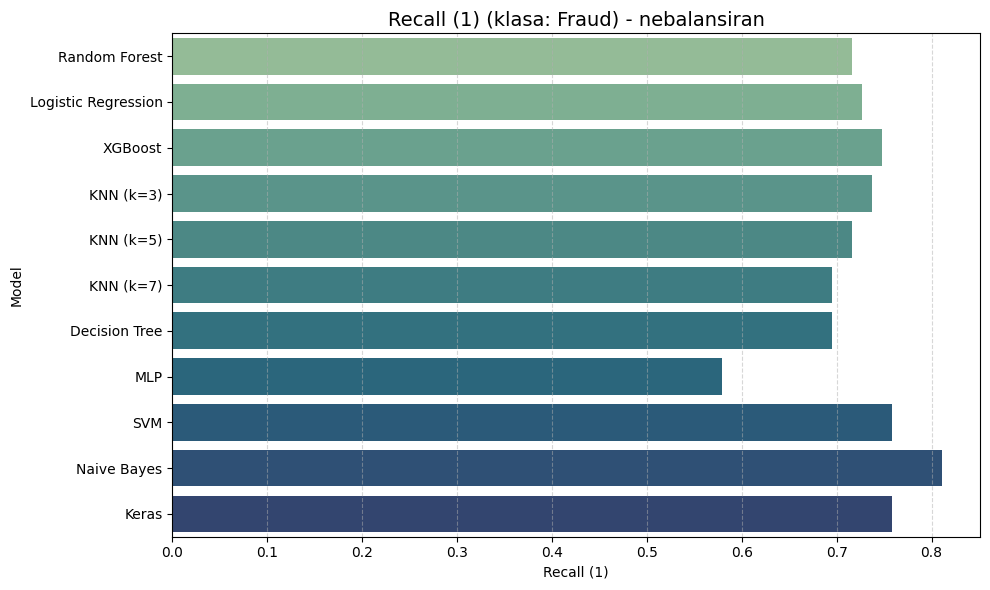

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_neb, x='Recall (1)', y='Model', palette='crest')

plt.title('Recall (1) (klasa: Fraud) - nebalansiran', fontsize=14)
plt.xlabel('Recall (1)')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-42-3493021982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_neb, x='F1-score (1)', y='Model', palette='crest')


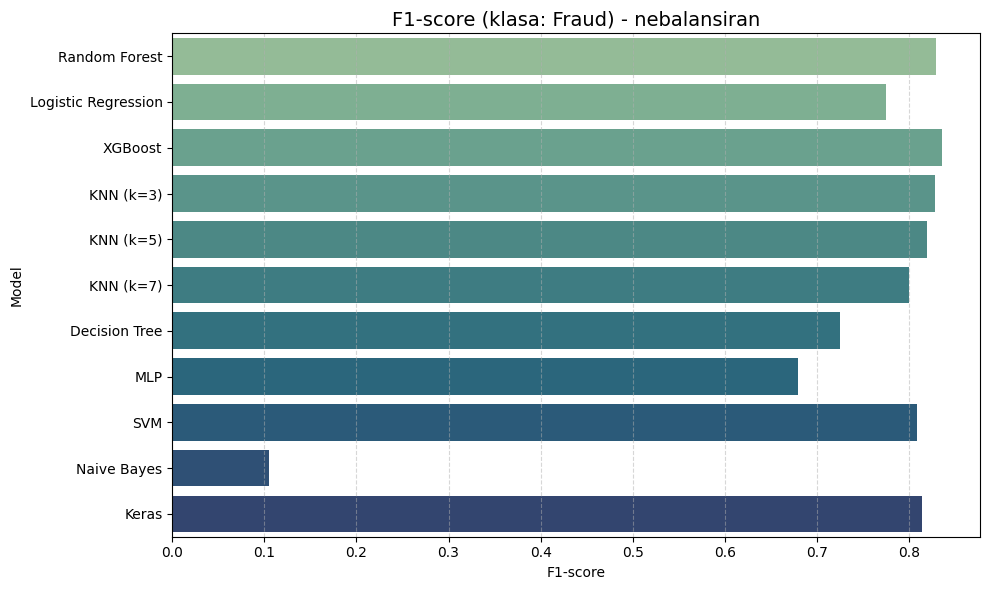

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_neb, x='F1-score (1)', y='Model', palette='crest')

plt.title('F1-score (klasa: Fraud) - nebalansiran', fontsize=14)
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Balansiran samo trening skup - oversampling

Korištena je SMOTE tehnika za balansiranje samo trening skupa, gdje su sintetički primjera manjinske klase, klase 1 (fraud).

Ova metoda pomaže u smanjenju problema neravnoteže u dataset-u.

Test skup ostaje nepromijenjen kako bi se postigla realna i nepristrana evaluacija modela.

In [ ]:
X_train2 = X_train
X_test2 = X_test
y_train2 = y_train
y_test2 = y_test

Primjena SMOTE tehnike na trening skupu podataka

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train2_res, y_train2_res = sm.fit_resample(X_train2, y_train2)

Vizualizacija distribucije prije i poslije SMOTE tehnike

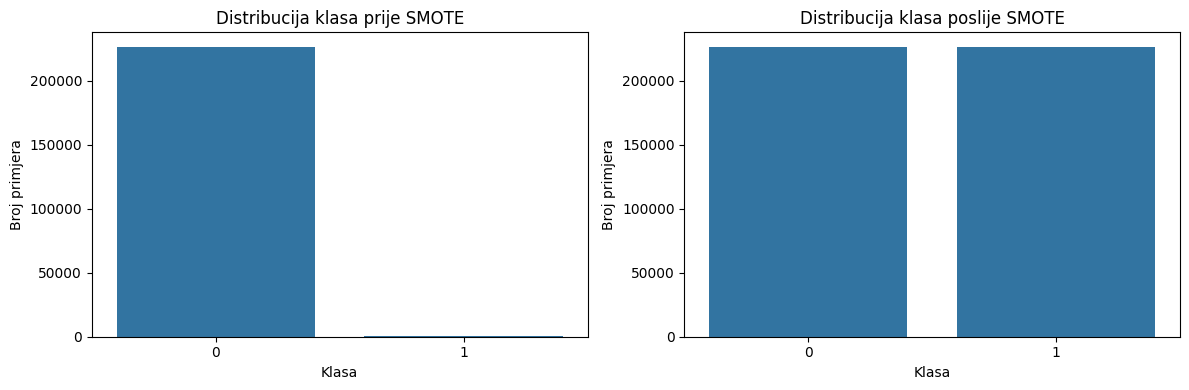

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribucija klasa prije SMOTE')
plt.xlabel('Klasa')
plt.ylabel('Broj primjera')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train2_res)
plt.title('Distribucija klasa poslije SMOTE')
plt.xlabel('Klasa')
plt.ylabel('Broj primjera')

plt.tight_layout()
plt.show()

2.1. Random forest


Random Forest (SMOTE)
Accuracy: 0.9995
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.91      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



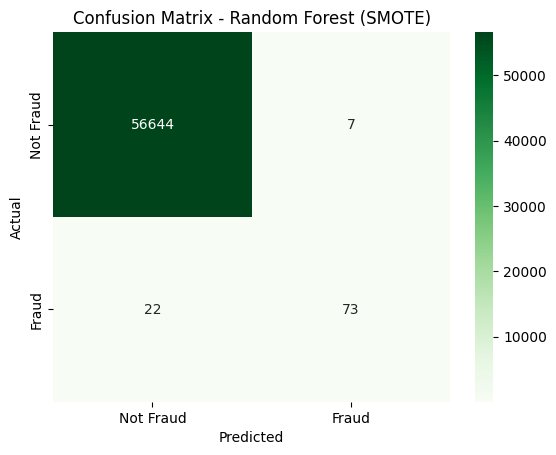

In [ ]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train2_res, y_train2_res)
y_pred_rf2 = rf2.predict(X_test2)

acc_rf2 = accuracy_score(y_test2, y_pred_rf2)
print("Random Forest (SMOTE)")
print(f'Accuracy: {acc_rf2:.4f}')
print(classification_report(y_test2, y_pred_rf2, target_names=['Not Fraud', 'Fraud']))

cm2 = confusion_matrix(y_test2, y_pred_rf2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Random Forest (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


2.2. Logistic Regression

Logistic Regression (SMOTE)
Accuracy: 0.9757
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56651
       Fraud       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



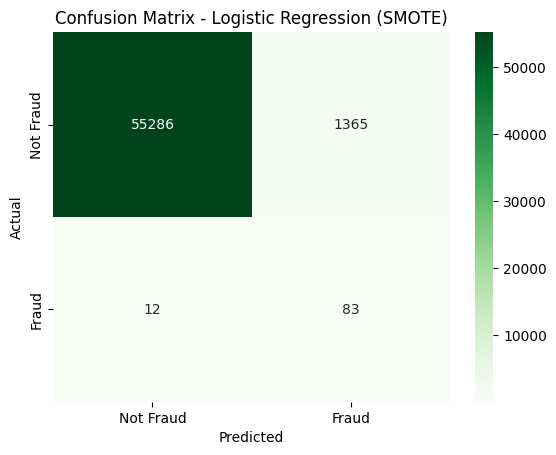

In [ ]:
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X_train2_res, y_train2_res)
y_pred_lr2 = lr2.predict(X_test2)

acc_lr2 = accuracy_score(y_test2, y_pred_lr2)
print("Logistic Regression (SMOTE)")
print(f'Accuracy: {acc_lr2:.4f}')
print(classification_report(y_test2, y_pred_lr2, target_names=['Not Fraud', 'Fraud']))

cm = confusion_matrix(y_test2, y_pred_lr2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Logistic Regression (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


2.3. XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:17:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (SMOTE)
Accuracy: 0.9992
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.74      0.79      0.76        95

    accuracy                           1.00     56746
   macro avg       0.87      0.89      0.88     56746
weighted avg       1.00      1.00      1.00     56746



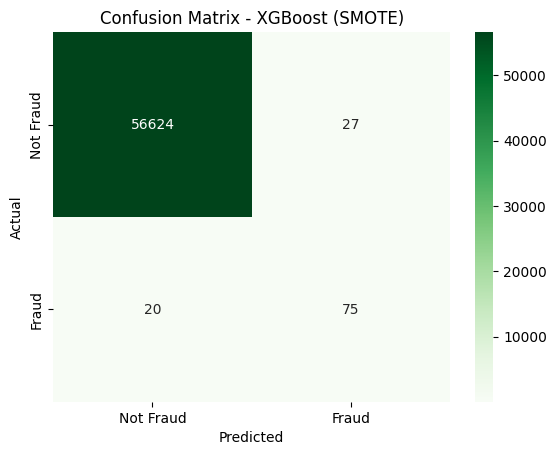

In [ ]:
xgb2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb2.fit(X_train2_res, y_train2_res)
y_pred_xgb2 = xgb2.predict(X_test2)

acc_xgb2 = accuracy_score(y_test2, y_pred_xgb2)
print("XGBoost (SMOTE)")
print(f'Accuracy: {acc_xgb2:.4f}')
print(classification_report(y_test2, y_pred_xgb2, target_names=['Not Fraud', 'Fraud']))

cm2 = confusion_matrix(y_test2, y_pred_xgb2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - XGBoost (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.4.1. KNN, k = 3

KNN, k=3 (SMOTE)
Accuracy: 0.9988
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.61      0.79      0.69        95

    accuracy                           1.00     56746
   macro avg       0.80      0.89      0.84     56746
weighted avg       1.00      1.00      1.00     56746



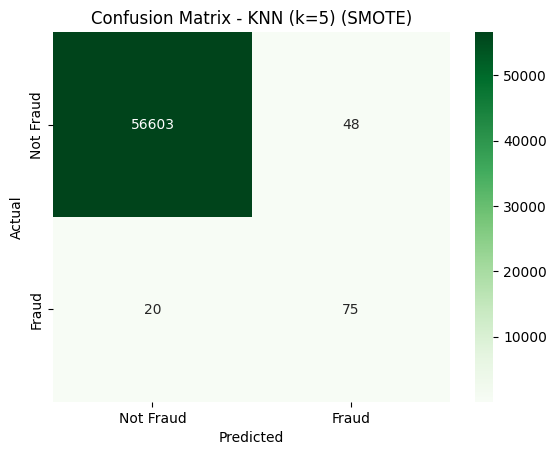

In [ ]:
knn2_3 = KNeighborsClassifier(n_neighbors=3)
knn2_3.fit(X_train2_res, y_train2_res)
y_pred_knn2_3 = knn2_3.predict(X_test2)

acc_knn2_3 = accuracy_score(y_test2, y_pred_knn2_3)
print("KNN, k=3 (SMOTE)")
print(f"Accuracy: {acc_knn2_3:.4f}")
print(classification_report(y_test2, y_pred_knn2_3, target_names=['Not Fraud', 'Fraud']))

cm2_3 = confusion_matrix(y_test2, y_pred_knn2_3)
sns.heatmap(cm2_3, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=5) (SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.4.2. KNN, k = 5

KNN (k=5) - SMOTE
Accuracy: 0.9984
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.52      0.80      0.63        95

    accuracy                           1.00     56746
   macro avg       0.76      0.90      0.81     56746
weighted avg       1.00      1.00      1.00     56746



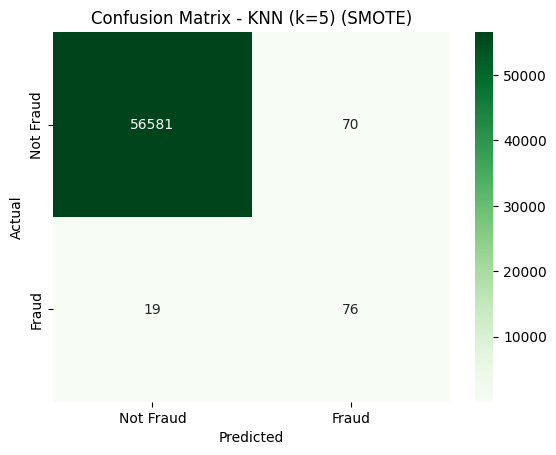

In [ ]:
knn2_5 = KNeighborsClassifier(n_neighbors=5)
knn2_5.fit(X_train2_res, y_train2_res)
y_pred_knn2_5 = knn2_5.predict(X_test2)

acc_knn2_5 = accuracy_score(y_test2, y_pred_knn2_5)
print("KNN (k=5) - SMOTE")
print(f"Accuracy: {acc_knn2_5:.4f}")
print(classification_report(y_test2, y_pred_knn2_5, target_names=['Not Fraud', 'Fraud']))

cm2_5 = confusion_matrix(y_test2, y_pred_knn2_5)
sns.heatmap(cm2_5, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=5) (SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.4.3. KNN, k = 7

KNN, k=7 (SMOTE)
Accuracy: 0.9979
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.43      0.80      0.56        95

    accuracy                           1.00     56746
   macro avg       0.71      0.90      0.78     56746
weighted avg       1.00      1.00      1.00     56746



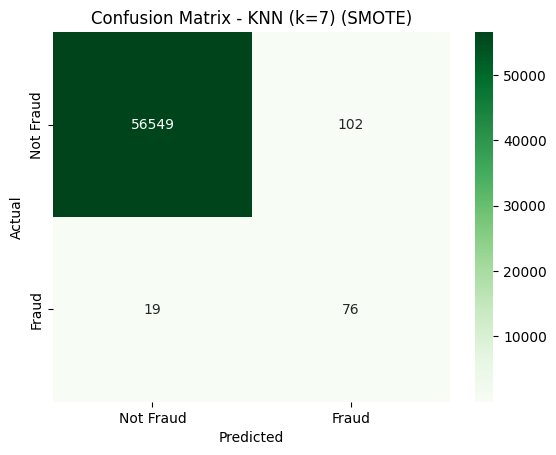

In [ ]:
knn2_7 = KNeighborsClassifier(n_neighbors=7)
knn2_7.fit(X_train2_res, y_train2_res)
y_pred_knn2_7 = knn2_7.predict(X_test2)

acc_knn2_7 = accuracy_score(y_test2, y_pred_knn2_7)
print("KNN, k=7 (SMOTE)")
print(f"Accuracy: {acc_knn2_7:.4f}")
print(classification_report(y_test2, y_pred_knn2_7, target_names=['Not Fraud', 'Fraud']))

cm2_7 = confusion_matrix(y_test2, y_pred_knn2_7)
sns.heatmap(cm2_7, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=7) (SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.5. Decision Tree

Decision Tree (SMOTE)
Accuracy: 0.9973
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.34      0.67      0.45        95

    accuracy                           1.00     56746
   macro avg       0.67      0.84      0.73     56746
weighted avg       1.00      1.00      1.00     56746



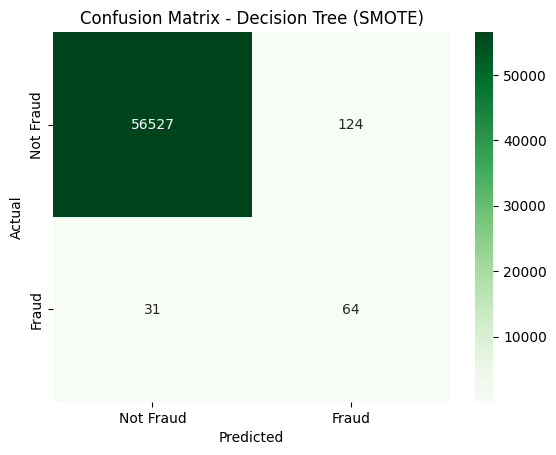

In [ ]:
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_train2_res, y_train2_res)
y_pred_dt2 = dt2.predict(X_test2)

acc_dt2 = accuracy_score(y_test2, y_pred_dt2)
print("Decision Tree (SMOTE)")
print(f"Accuracy: {acc_dt2:.4f}")
print(classification_report(y_test2, y_pred_dt2, target_names=['Not Fraud', 'Fraud']))

cm2 = confusion_matrix(y_test2, y_pred_dt2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Decision Tree (SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.6. MLP

MLP (SMOTE)
Accuracy: 0.9955
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.24      0.81      0.38        95

    accuracy                           1.00     56746
   macro avg       0.62      0.90      0.69     56746
weighted avg       1.00      1.00      1.00     56746



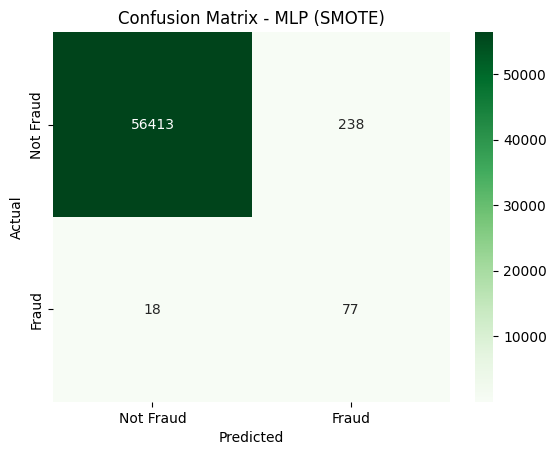

In [ ]:
mlp2 = MLPClassifier(random_state=42, max_iter=1000)
mlp2.fit(X_train2_res, y_train2_res)
y_pred_mlp2 = mlp2.predict(X_test2)

acc_mlp2 = accuracy_score(y_test2, y_pred_mlp2)
print("MLP (SMOTE)")
print(f"Accuracy: {acc_mlp2:.4f}")
print(classification_report(y_test2, y_pred_mlp2, target_names=['Not Fraud', 'Fraud']))

cm2 = confusion_matrix(y_test2, y_pred_mlp2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - MLP (SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.7. SVM

SVM (SMOTE)
Accuracy: 0.9816
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56651
       Fraud       0.07      0.85      0.13        95

    accuracy                           0.98     56746
   macro avg       0.54      0.92      0.56     56746
weighted avg       1.00      0.98      0.99     56746



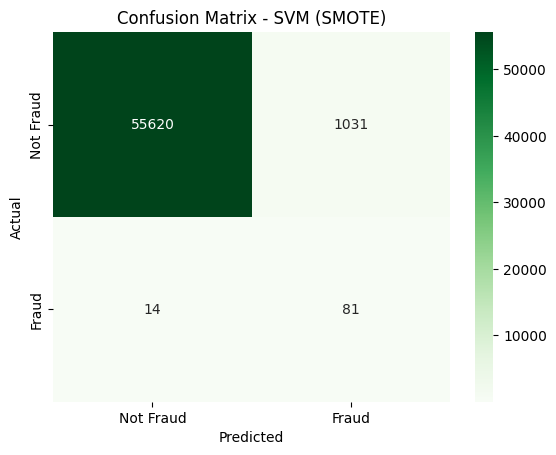

In [ ]:
svm2 = SVC(random_state=42)
svm2.fit(X_train2_res, y_train2_res)
y_pred_svm2 = svm2.predict(X_test2)

acc_svm2 = accuracy_score(y_test2, y_pred_svm2)
print("SVM (SMOTE)")
print(f"Accuracy: {acc_svm2:.4f}")
print(classification_report(y_test2, y_pred_svm2, target_names=['Not Fraud', 'Fraud']))

cm2 = confusion_matrix(y_test2, y_pred_svm2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - SVM (SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.8. Naive Bayes

Naive Bayes (SMOTE)
Accuracy: 0.9752
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56651
       Fraud       0.05      0.82      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.90      0.54     56746
weighted avg       1.00      0.98      0.99     56746



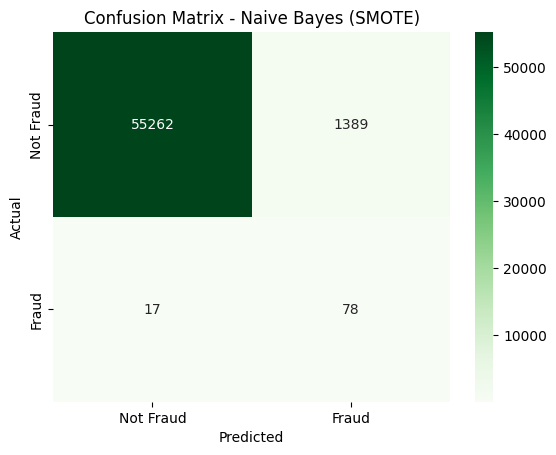

In [ ]:
threshold = 0.3
nb2 = GaussianNB()
nb2.fit(X_train2_res, y_train2_res)
y_proba_nb2 = nb2.predict_proba(X_test2)[:, 1]
y_pred_nb2 = (y_proba_nb2 >= threshold).astype(int)

acc_nb2 = accuracy_score(y_test2, y_pred_nb2)
print("Naive Bayes (SMOTE)")
print(f"Accuracy: {acc_nb2:.4f}")
print(classification_report(y_test2, y_pred_nb2, target_names=['Not Fraud', 'Fraud']))

cm2 = confusion_matrix(y_test2, y_pred_nb2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Naive Bayes (SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2.9. Keras model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras model (SMOTE skup)
Accuracy: 0.9645
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98     56651
       Fraud       0.04      0.87      0.08        95

    accuracy                           0.96     56746
   macro avg       0.52      0.92      0.53     56746
weighted avg       1.00      0.96      0.98     56746



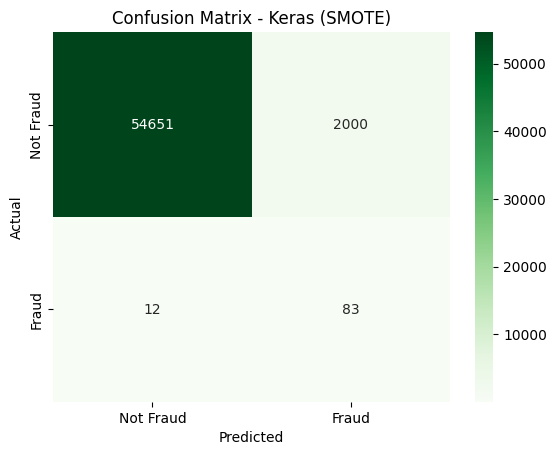

In [ ]:
keras2 = Sequential()
keras2.add(Dense(32, activation='relu', input_shape=(X_train2_res.shape[1],)))
keras2.add(Dense(16, activation='relu'))
keras2.add(Dense(1, activation='sigmoid'))

keras2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
keras2.fit(X_train2_res, y_train2_res, epochs=10, batch_size=32, verbose=0)

loss2, acc_keras2 = keras2.evaluate(X_test2, y_test2, verbose=0)
print("Keras model (SMOTE skup)")
print(f"Accuracy: {acc_keras2:.4f}")
y_proba_keras2 = keras2.predict(X_test2)
y_pred_keras2 = (y_proba_keras2 >= 0.5).astype(int).flatten()
print(classification_report(y_test2, y_pred_keras2, target_names=['Not Fraud', 'Fraud']))
cm2 = confusion_matrix(y_test2, y_pred_keras2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Keras (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Poređenje modela za balansirani skup podataka - SMOTE

In [ ]:
results_smote = [
    get_metrics(y_test2, y_pred_rf2, 'Random Forest'),
    get_metrics(y_test2, y_pred_lr2, 'Logistic Regression'),
    get_metrics(y_test2, y_pred_xgb2, 'XGBoost'),
    get_metrics(y_test2, y_pred_knn2_3, 'KNN (k=3)'),
    get_metrics(y_test2, y_pred_knn2_5, 'KNN (k=5)'),
    get_metrics(y_test2, y_pred_knn2_7, 'KNN (k=7)'),
    get_metrics(y_test2, y_pred_dt2, 'Decision Tree'),
    get_metrics(y_test2, y_pred_mlp2, 'MLP'),
    get_metrics(y_test2, y_pred_svm2, 'SVM'),
    get_metrics(y_test2, y_pred_nb2, 'Naive Bayes'),
    get_metrics(y_test2, y_pred_keras2, 'Keras'),
]

data_smote = pd.DataFrame(results_smote)
print("Poređenje modela: SMOTE")
print(data_smote.sort_values(by='F1-score (1)', ascending=False))

Poređenje modela: SMOTE
                  Model  Accuracy  Precision (1)  Recall (1)  F1-score (1)
0         Random Forest  0.999489       0.912500    0.768421      0.834286
2               XGBoost  0.999172       0.735294    0.789474      0.761421
3             KNN (k=3)  0.998802       0.609756    0.789474      0.688073
4             KNN (k=5)  0.998432       0.520548    0.800000      0.630705
5             KNN (k=7)  0.997868       0.426966    0.800000      0.556777
6         Decision Tree  0.997269       0.340426    0.673684      0.452297
7                   MLP  0.995489       0.244444    0.810526      0.375610
8                   SVM  0.981585       0.072842    0.852632      0.134217
1   Logistic Regression  0.975734       0.057320    0.873684      0.107583
9           Naive Bayes  0.975223       0.053170    0.821053      0.099872
10                Keras  0.964544       0.039846    0.873684      0.076217


Histogram performasi

/tmp/ipython-input-60-3703186587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_smote, x='Accuracy', y='Model', palette='crest')


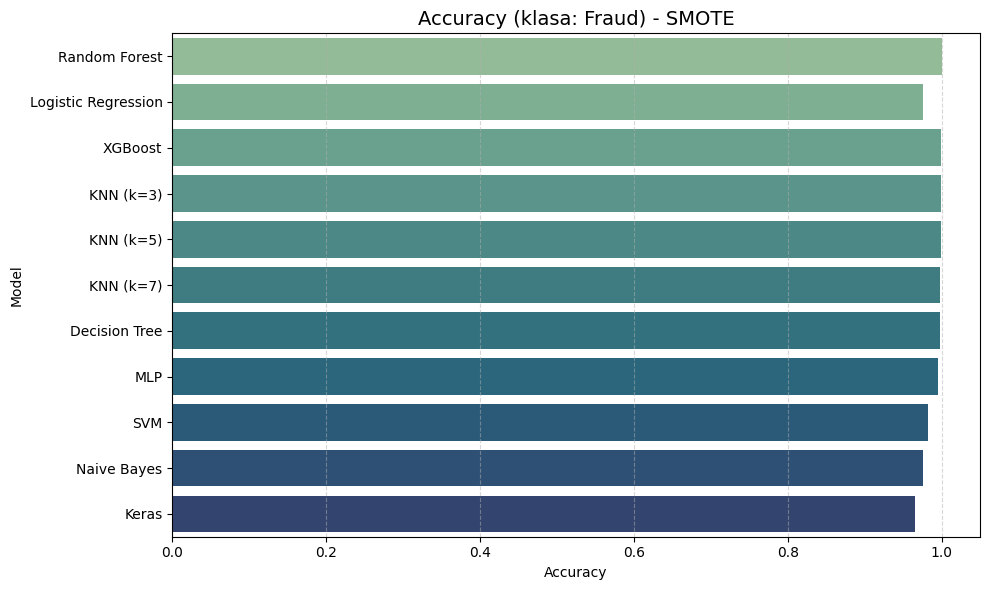

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_smote, x='Accuracy', y='Model', palette='crest')

plt.title('Accuracy (klasa: Fraud) - SMOTE', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-61-3348851000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_smote, x='Precision (1)', y='Model', palette='crest')


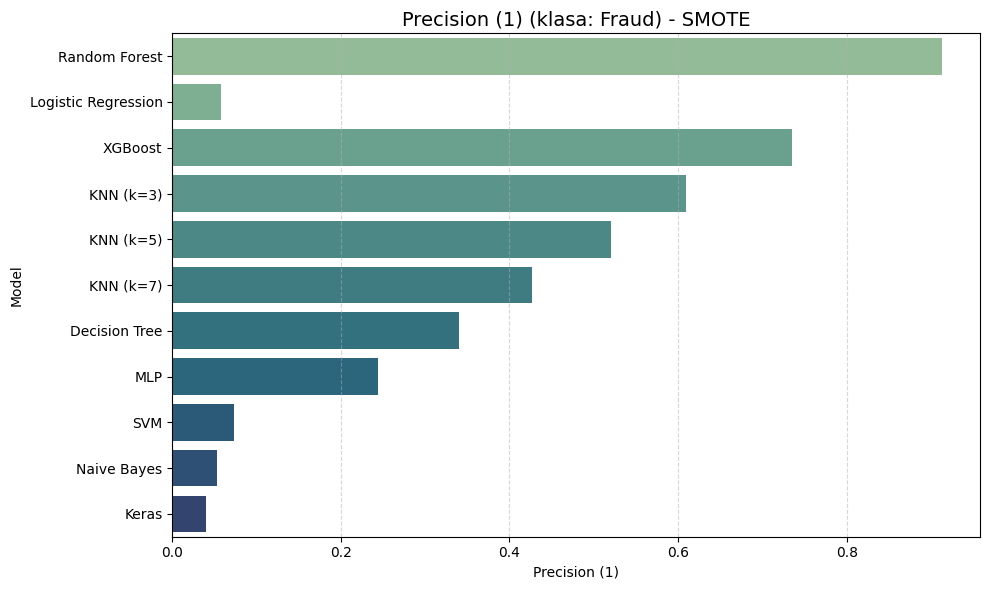

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_smote, x='Precision (1)', y='Model', palette='crest')

plt.title('Precision (1) (klasa: Fraud) - SMOTE', fontsize=14)
plt.xlabel('Precision (1)')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-62-2918846386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_smote, x='Recall (1)', y='Model', palette='crest')


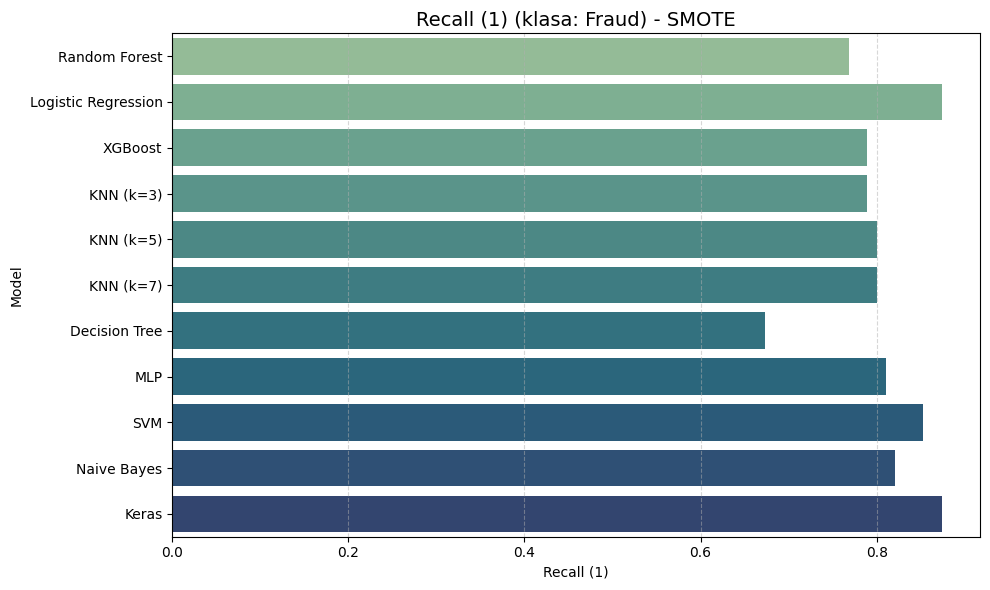

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_smote, x='Recall (1)', y='Model', palette='crest')

plt.title('Recall (1) (klasa: Fraud) - SMOTE', fontsize=14)
plt.xlabel('Recall (1)')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-59-3943736216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_smote, x='F1-score (1)', y='Model', palette='crest')


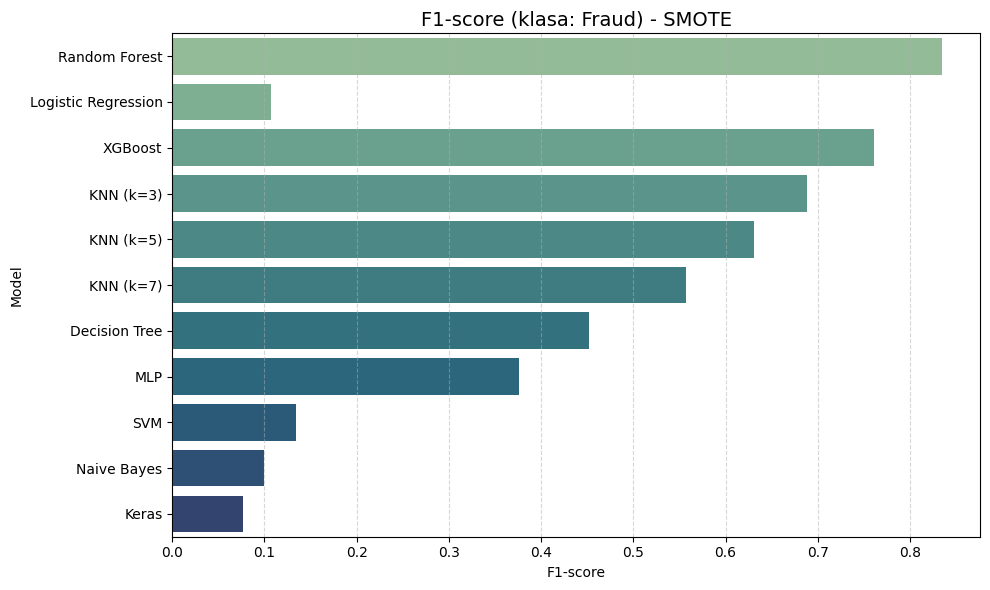

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_smote, x='F1-score (1)', y='Model', palette='crest')

plt.title('F1-score (klasa: Fraud) - SMOTE', fontsize=14)
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Balansiran trening skup podataka - undersampling

Kod ovog pristupa prilagođen je trening skup, tako što su se nasumično uklonili primjerci većinske klase, klase 0 (non-fraud), kako bi se postigao balans između obje klase.

In [ ]:
X_train3 = X_train
X_test3 = X_test
y_train3 = y_train
y_test3 = y_test

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train3_res, y_train3_res = rus.fit_resample(X_train3, y_train3)

Vizualizacija distribucije prije i poslije undersamplinga

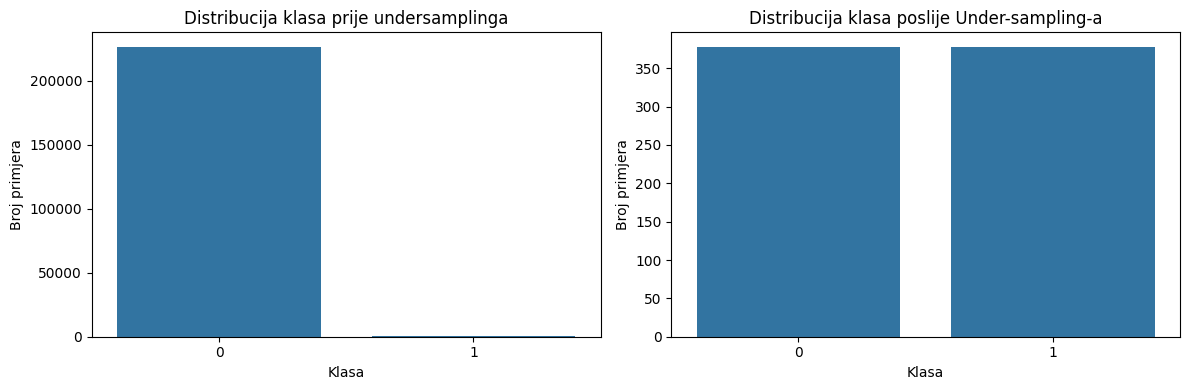

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribucija klasa prije undersamplinga')
plt.xlabel('Klasa')
plt.ylabel('Broj primjera')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train3_res)
plt.title('Distribucija klasa poslije Under-sampling-a')
plt.xlabel('Klasa')
plt.ylabel('Broj primjera')

plt.tight_layout()
plt.show()

3.1. Random forest

Random Forest (Undersampling)
Accuracy: 0.9840
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56651
       Fraud       0.08      0.87      0.15        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.57     56746
weighted avg       1.00      0.98      0.99     56746



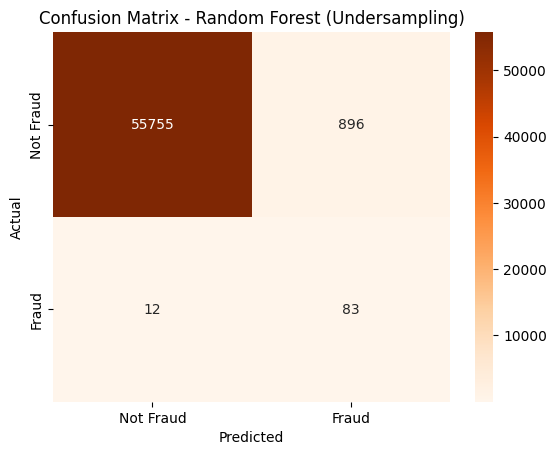

In [ ]:
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train3_res, y_train3_res)
y_pred_rf3 = rf3.predict(X_test3)

acc_rf3 = accuracy_score(y_test3, y_pred_rf3)
print("Random Forest (Undersampling)")
print(f'Accuracy: {acc_rf3:.4f}')
print(classification_report(y_test3, y_pred_rf3, target_names=['Not Fraud', 'Fraud']))

cm3 = confusion_matrix(y_test3, y_pred_rf3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Random Forest (Undersampling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


3.2. Logistic Regression

Logistic Regression (Undersampling)
Accuracy: 0.9977
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.41      0.79      0.54        95

    accuracy                           1.00     56746
   macro avg       0.70      0.89      0.77     56746
weighted avg       1.00      1.00      1.00     56746



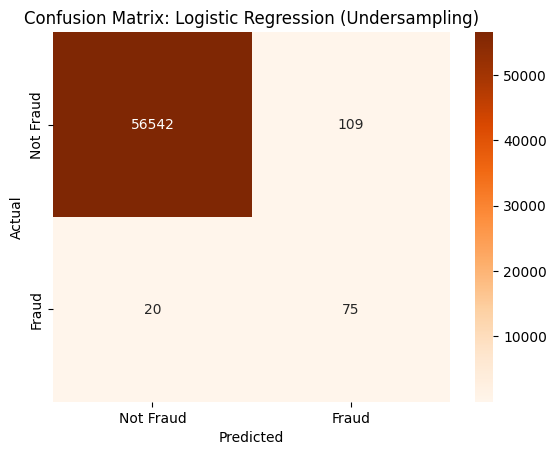

In [ ]:
lr3 = LogisticRegression(max_iter=1000)
lr3.fit(X_train3_res, y_train3_res)
y_pred_lr3 = lr3.predict(X_test3)

acc_lr3 = accuracy_score(y_test3, y_pred_lr3)
print("Logistic Regression (Undersampling)")
print(f'Accuracy: {acc_lr3:.4f}')
print(classification_report(y_test3, y_pred_lr3, target_names=['Not Fraud', 'Fraud']))

cm = confusion_matrix(y_test3, y_pred_lr3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix: Logistic Regression (Undersampling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


3.3. XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:53:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (Undersampling)
Accuracy: 0.9722
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     56651
       Fraud       0.05      0.86      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746



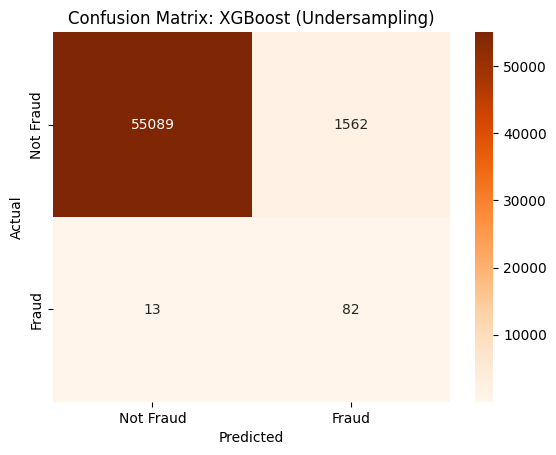

In [ ]:
xgb3 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb3.fit(X_train3_res, y_train3_res)
y_pred_xgb3 = xgb3.predict(X_test3)

acc_xgb3 = accuracy_score(y_test3, y_pred_xgb3)
print("XGBoost (Undersampling)")
print(f'Accuracy: {acc_xgb3:.4f}')
print(classification_report(y_test3, y_pred_xgb3, target_names=['Not Fraud', 'Fraud']))

cm3 = confusion_matrix(y_test3, y_pred_xgb3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix: XGBoost (Undersampling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.4.1. KNN, k = 3

KNN, k=3 (Undersampling)
Accuracy: 0.9729
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     56651
       Fraud       0.05      0.82      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.90      0.54     56746
weighted avg       1.00      0.97      0.98     56746



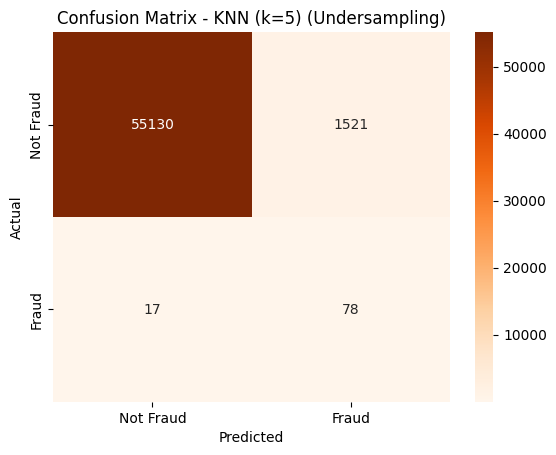

In [ ]:
knn3_3 = KNeighborsClassifier(n_neighbors=3)
knn3_3.fit(X_train3_res, y_train3_res)
y_pred_knn3_3 = knn3_3.predict(X_test3)

acc_knn3_3 = accuracy_score(y_test3, y_pred_knn3_3)
print("KNN, k=3 (Undersampling)")
print(f"Accuracy: {acc_knn3_3:.4f}")
print(classification_report(y_test3, y_pred_knn3_3, target_names=['Not Fraud', 'Fraud']))

cm3_3 = confusion_matrix(y_test3, y_pred_knn3_3)
sns.heatmap(cm3_3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=5) (Undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.4.2. KNN, k = 5

KNN, k=5 (Undersampling)
Accuracy: 0.9837
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56651
       Fraud       0.08      0.82      0.14        95

    accuracy                           0.98     56746
   macro avg       0.54      0.90      0.57     56746
weighted avg       1.00      0.98      0.99     56746



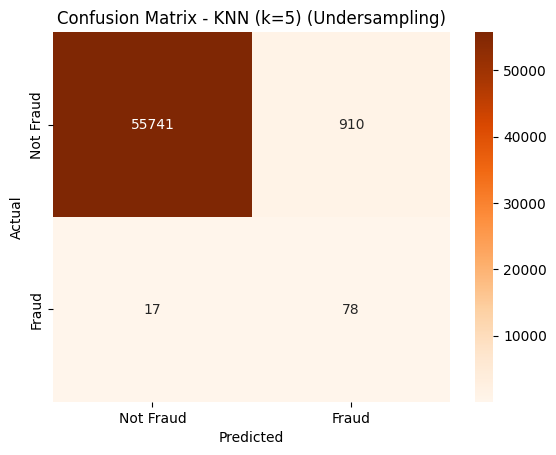

In [ ]:
knn3_5 = KNeighborsClassifier(n_neighbors=5)
knn3_5.fit(X_train3_res, y_train3_res)
y_pred_knn3_5 = knn3_5.predict(X_test3)

acc_knn3_5 = accuracy_score(y_test3, y_pred_knn3_5)
print("KNN, k=5 (Undersampling)")
print(f"Accuracy: {acc_knn3_5:.4f}")
print(classification_report(y_test3, y_pred_knn3_5, target_names=['Not Fraud', 'Fraud']))

cm3_5 = confusion_matrix(y_test3, y_pred_knn3_5)
sns.heatmap(cm3_5, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=5) (Undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.4.3. KNN, k = 7

KNN, k=7 (Undersampling)
Accuracy: 0.9879
              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99     56651
       Fraud       0.10      0.81      0.18        95

    accuracy                           0.99     56746
   macro avg       0.55      0.90      0.59     56746
weighted avg       1.00      0.99      0.99     56746



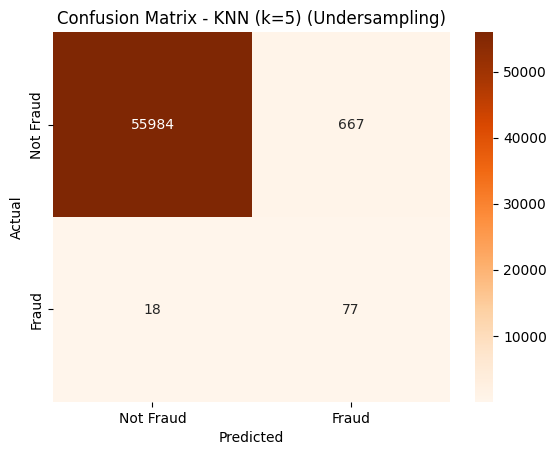

In [ ]:
knn3_7 = KNeighborsClassifier(n_neighbors=7)
knn3_7.fit(X_train3_res, y_train3_res)
y_pred_knn3_7 = knn3_7.predict(X_test3)

acc_knn3_7 = accuracy_score(y_test3, y_pred_knn3_7)
print("KNN, k=7 (Undersampling)")
print(f"Accuracy: {acc_knn3_7:.4f}")
print(classification_report(y_test3, y_pred_knn3_7, target_names=['Not Fraud', 'Fraud']))

cm3_7 = confusion_matrix(y_test3, y_pred_knn3_7)
sns.heatmap(cm3_7, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - KNN (k=5) (Undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.5. Decision Tree

Decision Tree (Undersampling)
Accuracy: 0.8965
              precision    recall  f1-score   support

   Not Fraud       1.00      0.90      0.95     56651
       Fraud       0.01      0.94      0.03        95

    accuracy                           0.90     56746
   macro avg       0.51      0.92      0.49     56746
weighted avg       1.00      0.90      0.94     56746



Text(50.722222222222214, 0.5, 'Actual')

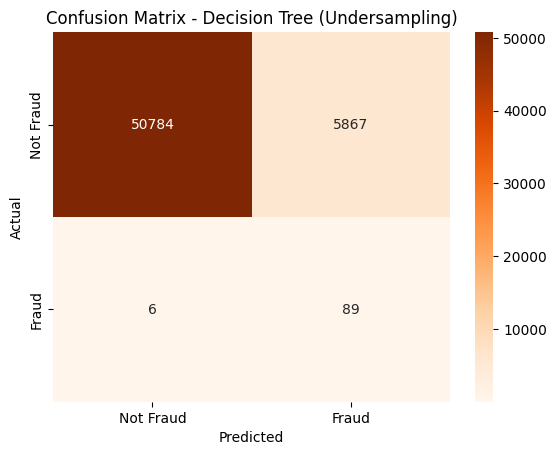

In [ ]:
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_train3_res, y_train3_res)
y_pred_dt3 = dt3.predict(X_test3)

acc_dt3 = accuracy_score(y_test3, y_pred_dt3)
print("Decision Tree (Undersampling)")
print(f"Accuracy: {acc_dt3:.4f}")
print(classification_report(y_test3, y_pred_dt3, target_names=['Not Fraud', 'Fraud']))

cm3 = confusion_matrix(y_test3, y_pred_dt3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Decision Tree (Undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Actual')

3.6. MLP

MLP (Undersampling)
Accuracy: 0.9847
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56651
       Fraud       0.09      0.86      0.16        95

    accuracy                           0.98     56746
   macro avg       0.54      0.92      0.58     56746
weighted avg       1.00      0.98      0.99     56746



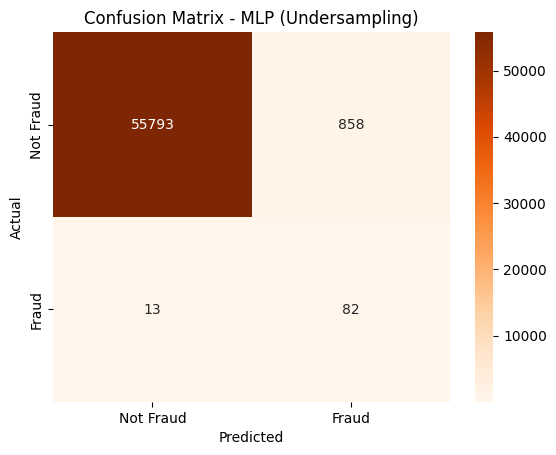

In [ ]:
mlp3 = MLPClassifier(random_state=42, max_iter=1000)
mlp3.fit(X_train3_res, y_train3_res)
y_pred_mlp3 = mlp3.predict(X_test3)

acc_mlp3 = accuracy_score(y_test3, y_pred_mlp3)
print("MLP (Undersampling)")
print(f"Accuracy: {acc_mlp3:.4f}")
print(classification_report(y_test3, y_pred_mlp3, target_names=['Not Fraud', 'Fraud']))

cm3 = confusion_matrix(y_test3, y_pred_mlp3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - MLP (Undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.7. SVM

SVM (Undersampling)
Accuracy: 0.9968
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.32      0.79      0.45        95

    accuracy                           1.00     56746
   macro avg       0.66      0.89      0.73     56746
weighted avg       1.00      1.00      1.00     56746



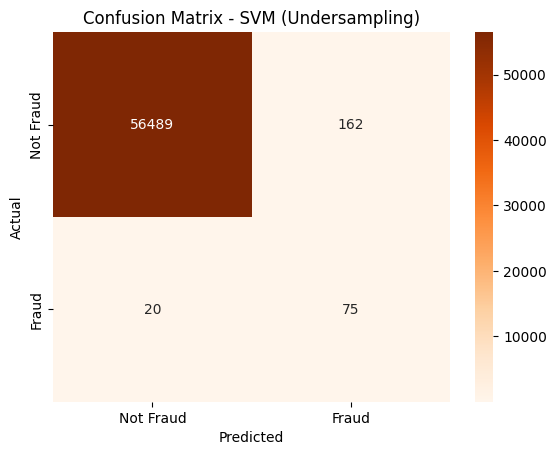

In [ ]:
svm3 = SVC(random_state=42)
svm3.fit(X_train3_res, y_train3_res)
y_pred_svm3 = svm3.predict(X_test3)

acc_svm3 = accuracy_score(y_test3, y_pred_svm3)
print("SVM (Undersampling)")
print(f"Accuracy: {acc_svm3:.4f}")
print(classification_report(y_test3, y_pred_svm3, target_names=['Not Fraud', 'Fraud']))

cm3 = confusion_matrix(y_test3, y_pred_svm3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - SVM (Undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.8. Naive Bayes

Naive Bayes (SMOTE)
Naive Bayes (Undersampling)
Accuracy: 0.9682
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.98     56651
       Fraud       0.04      0.81      0.08        95

    accuracy                           0.97     56746
   macro avg       0.52      0.89      0.53     56746
weighted avg       1.00      0.97      0.98     56746



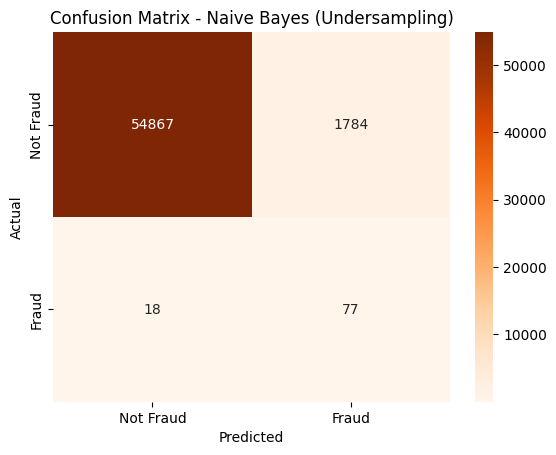

In [ ]:
print("Naive Bayes (SMOTE)")
nb3 = GaussianNB()
nb3.fit(X_train3_res, y_train3_res)
y_proba_nb3 = nb3.predict_proba(X_test3)[:, 1]
y_pred_nb3 = (y_proba_nb3 >= threshold).astype(int)

acc_nb3 = accuracy_score(y_test3, y_pred_nb3)
print("Naive Bayes (Undersampling)")
print(f"Accuracy: {acc_nb3:.4f}")
print(classification_report(y_test3, y_pred_nb3, target_names=['Not Fraud', 'Fraud']))

cm3 = confusion_matrix(y_test3, y_pred_nb3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Naive Bayes (Undersampling)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3.9. Keras model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras model (Undersampling)
Accuracy: 0.9990
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56651
       Fraud       0.66      0.77      0.71        95

    accuracy                           1.00     56746
   macro avg       0.83      0.88      0.86     56746
weighted avg       1.00      1.00      1.00     56746



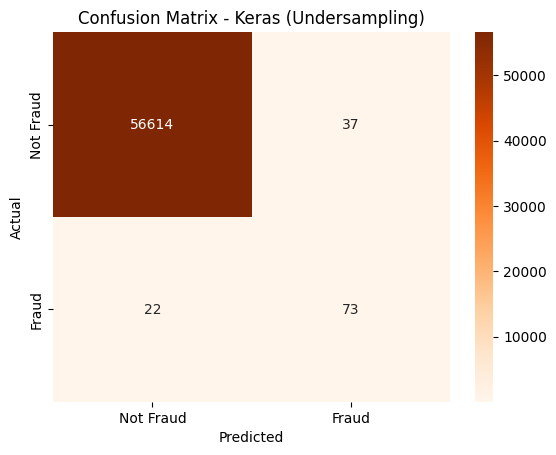

In [ ]:
keras3 = Sequential()
keras3.add(Dense(32, activation='relu', input_shape=(X_train3_res.shape[1],)))
keras3.add(Dense(16, activation='relu'))
keras3.add(Dense(1, activation='sigmoid'))

keras3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
keras3.fit(X_train3_res, y_train3_res, epochs=10, batch_size=32, verbose=0)

loss3, acc_keras3 = keras3.evaluate(X_test3, y_test3, verbose=0)
print("Keras model (Undersampling)")
print(f"Accuracy: {acc_keras3:.4f}")
y_proba_keras3 = keras3.predict(X_test3)
y_pred_keras3 = (y_proba_keras3 >= 0.5).astype(int).flatten()
print(classification_report(y_test3, y_pred_keras3, target_names=['Not Fraud', 'Fraud']))
cm3 = confusion_matrix(y_test3, y_pred_keras3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - Keras (Undersampling)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Poređenje modela za balansirani skup podataka - undersampling

In [ ]:
results_under = [
    get_metrics(y_test3, y_pred_rf3, 'Random Forest'),
    get_metrics(y_test3, y_pred_lr3, 'Logistic Regression'),
    get_metrics(y_test3, y_pred_xgb3, 'XGBoost'),
    get_metrics(y_test3, y_pred_knn3_3, 'KNN (k=3)'),
    get_metrics(y_test3, y_pred_knn3_5, 'KNN (k=5)'),
    get_metrics(y_test3, y_pred_knn3_7, 'KNN (k=7)'),
    get_metrics(y_test3, y_pred_dt3, 'Decision Tree'),
    get_metrics(y_test3, y_pred_mlp3, 'MLP'),
    get_metrics(y_test3, y_pred_svm3, 'SVM'),
    get_metrics(y_test3, y_pred_nb3, 'Naive Bayes'),
    get_metrics(y_test3, y_pred_keras3, 'Keras'),
]

data_under = pd.DataFrame(results_under)
print("Poređenje modela: Undersampling")
print(data_under.sort_values(by='F1-score (1)', ascending=False))

Poređenje modela: Undersampling
                  Model  Accuracy  Precision (1)  Recall (1)  F1-score (1)
10                Keras  0.998960       0.663636    0.768421      0.712195
1   Logistic Regression  0.997727       0.407609    0.789474      0.537634
8                   SVM  0.996793       0.316456    0.789474      0.451807
5             KNN (k=7)  0.987929       0.103495    0.810526      0.183552
7                   MLP  0.984651       0.087234    0.863158      0.158454
0         Random Forest  0.983999       0.084780    0.873684      0.154562
4             KNN (k=5)  0.983664       0.078947    0.821053      0.144044
2               XGBoost  0.972245       0.049878    0.863158      0.094307
3             KNN (k=3)  0.972897       0.048780    0.821053      0.092090
9           Naive Bayes  0.968244       0.041376    0.810526      0.078732
6         Decision Tree  0.896504       0.014943    0.936842      0.029417


Histogram performansi

/tmp/ipython-input-79-1455069434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_under, x='Accuracy', y='Model', palette='crest')


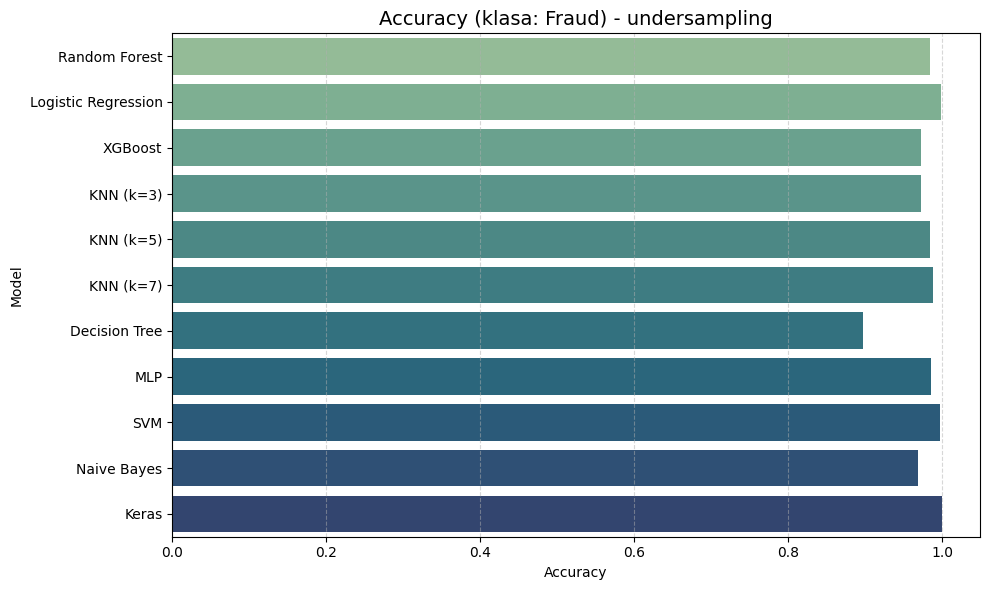

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_under, x='Accuracy', y='Model', palette='crest')

plt.title('Accuracy (klasa: Fraud) - undersampling', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-80-1601996874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_under, x='Precision (1)', y='Model', palette='crest')


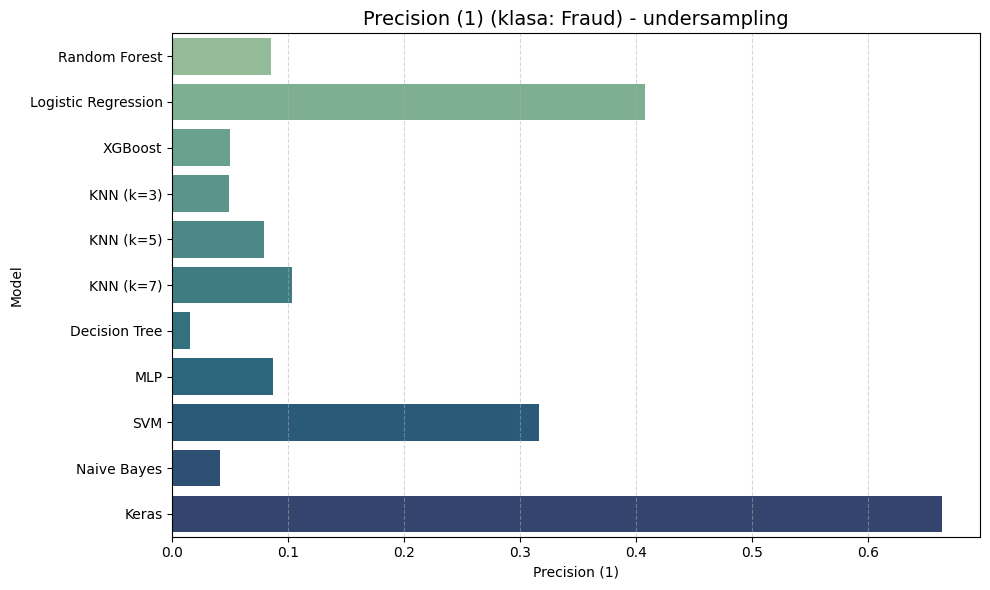

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_under, x='Precision (1)', y='Model', palette='crest')

plt.title('Precision (1) (klasa: Fraud) - undersampling', fontsize=14)
plt.xlabel('Precision (1)')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-81-2556854342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_under, x='Recall (1)', y='Model', palette='crest')


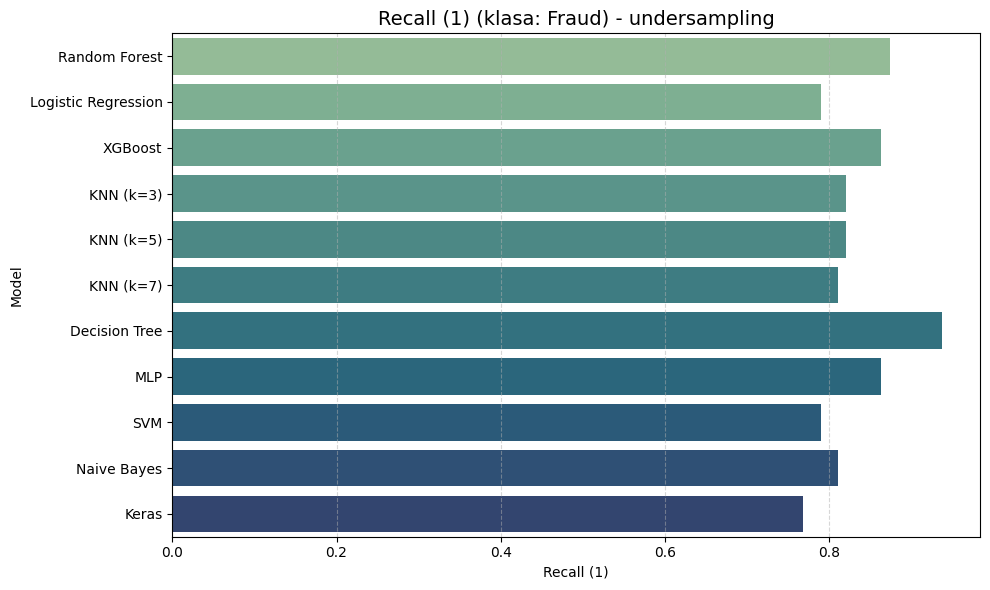

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_under, x='Recall (1)', y='Model', palette='crest')

plt.title('Recall (1) (klasa: Fraud) - undersampling', fontsize=14)
plt.xlabel('Recall (1)')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-82-3310855734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_under, x='F1-score (1)', y='Model', palette='crest')


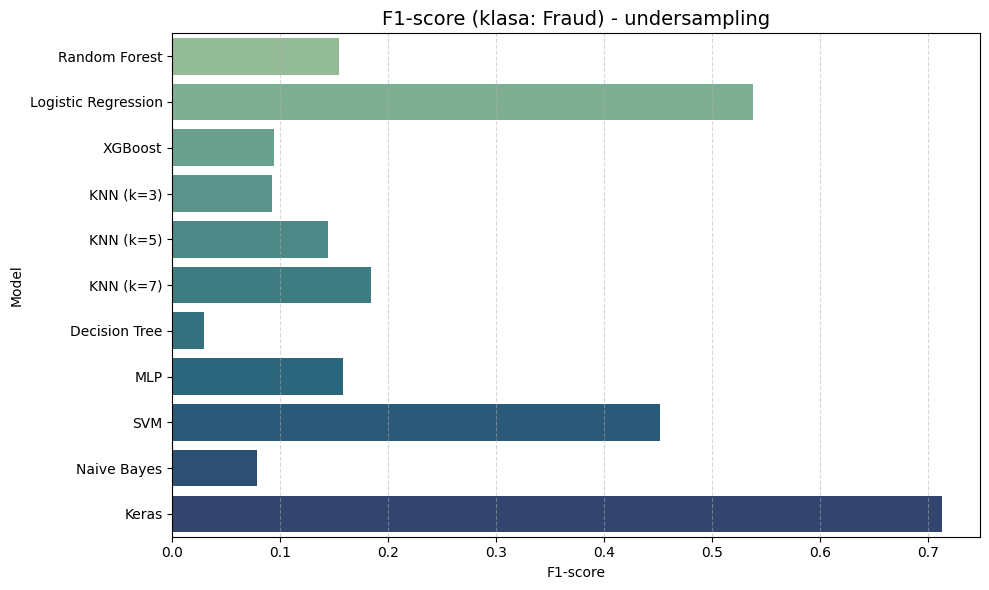

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_under, x='F1-score (1)', y='Model', palette='crest')

plt.title('F1-score (klasa: Fraud) - undersampling', fontsize=14)
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Upoređivanje rezultata svih modela zajedno

In [ ]:
data_all = pd.concat([
    data_neb.assign(Skup='Nebalansiran'),
    data_smote.assign(Skup='SMOTE'),
    data_under.assign(Skup='Undersampling')
])

print("Poređenje svih modela kroz sve pristupe: ")
print(data_all.sort_values(by='F1-score (1)', ascending=False))


Poređenje svih modela kroz sve pristupe: 
                  Model  Accuracy  Precision (1)  Recall (1)  F1-score (1)  \
2               XGBoost  0.999507       0.946667    0.747368      0.835294   
0         Random Forest  0.999489       0.912500    0.768421      0.834286   
0         Random Forest  0.999507       0.985507    0.715789      0.829268   
3             KNN (k=3)  0.999489       0.945946    0.736842      0.828402   
4             KNN (k=5)  0.999471       0.957746    0.715789      0.819277   
10                Keras  0.999418       0.878049    0.757895      0.813559   
8                   SVM  0.999401       0.867470    0.757895      0.808989   
5             KNN (k=7)  0.999418       0.942857    0.694737      0.800000   
1   Logistic Regression  0.999295       0.831325    0.726316      0.775281   
2               XGBoost  0.999172       0.735294    0.789474      0.761421   
6         Decision Tree  0.999119       0.758621    0.694737      0.725275   
10                Kera

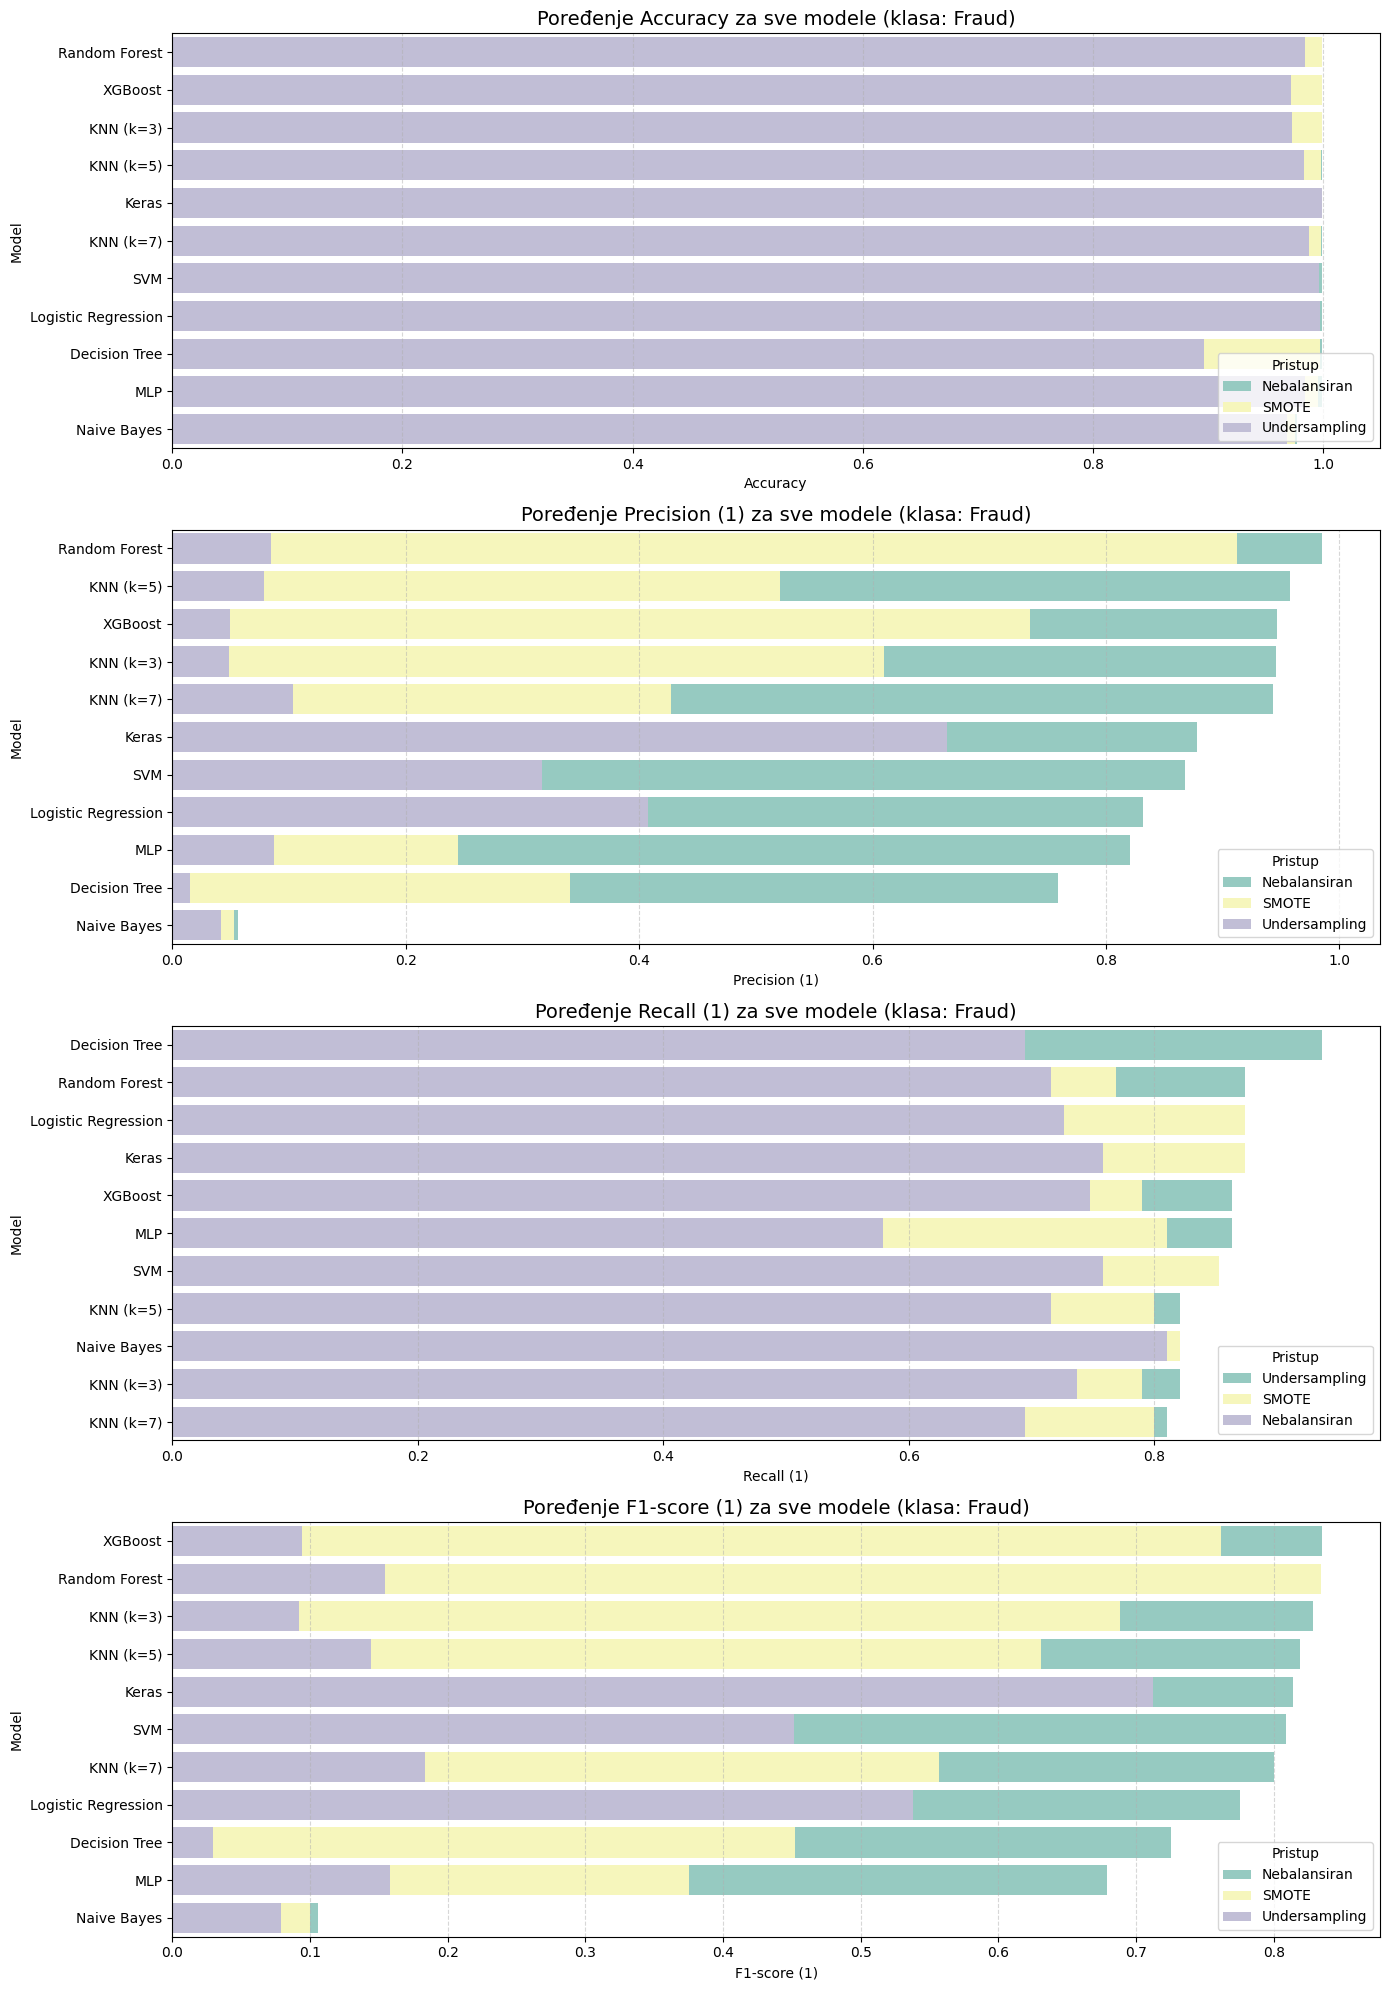

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']
plt.figure(figsize=(14, 5 * len(metrics)))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    data_sorted = data_all.sort_values(by=metric, ascending=False)
    sns.barplot(data=data_sorted, x=metric, y='Model', hue='Skup', dodge=False, palette='Set3')
    plt.title(f'Poređenje {metric} za sve modele (klasa: Fraud)', fontsize=14)
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.legend(title='Pristup')
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Uporedjivanje rezultatat po modelima

In [ ]:
def oznaci_pristup(lista_rezultata, pristup):
    for item in lista_rezultata:
        item['Pristup'] = pristup
    return lista_rezultata

results_neb = oznaci_pristup(results_neb, 'Nebalansiran')
results_smote = oznaci_pristup(results_smote, 'SMOTE')
results_under = oznaci_pristup(results_under, 'Undersampling')


In [ ]:
svi_rezultati = results_neb + results_smote + results_under
df = pd.DataFrame(svi_rezultati)

In [ ]:
print(df[df['Model'] == 'Random Forest'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
0    Nebalansiran  0.999507       0.985507    0.715789      0.829268
11          SMOTE  0.999489       0.912500    0.768421      0.834286
22  Undersampling  0.983999       0.084780    0.873684      0.154562


In [ ]:
print(df[df['Model'] == 'Logistic Regression'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
1    Nebalansiran  0.999295       0.831325    0.726316      0.775281
12          SMOTE  0.975734       0.057320    0.873684      0.107583
23  Undersampling  0.997727       0.407609    0.789474      0.537634


In [ ]:
print(df[df['Model'] == 'XGBoost'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
2    Nebalansiran  0.999507       0.946667    0.747368      0.835294
13          SMOTE  0.999172       0.735294    0.789474      0.761421
24  Undersampling  0.972245       0.049878    0.863158      0.094307


In [ ]:
print(df[df['Model'] == 'KNN (k=3)'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
3    Nebalansiran  0.999489       0.945946    0.736842      0.828402
14          SMOTE  0.998802       0.609756    0.789474      0.688073
25  Undersampling  0.972897       0.048780    0.821053      0.092090


In [ ]:
print(df[df['Model'] == 'KNN (k=5)'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
4    Nebalansiran  0.999471       0.957746    0.715789      0.819277
15          SMOTE  0.998432       0.520548    0.800000      0.630705
26  Undersampling  0.983664       0.078947    0.821053      0.144044


In [ ]:
print(df[df['Model'] == 'KNN (k=7)'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
5    Nebalansiran  0.999418       0.942857    0.694737      0.800000
16          SMOTE  0.997868       0.426966    0.800000      0.556777
27  Undersampling  0.987929       0.103495    0.810526      0.183552


In [ ]:
print(df[df['Model'] == 'Decision Tree'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
6    Nebalansiran  0.999119       0.758621    0.694737      0.725275
17          SMOTE  0.997269       0.340426    0.673684      0.452297
28  Undersampling  0.896504       0.014943    0.936842      0.029417


In [ ]:
print(df[df['Model'] == 'MLP'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
7    Nebalansiran  0.999084       0.820896    0.578947      0.679012
18          SMOTE  0.995489       0.244444    0.810526      0.375610
29  Undersampling  0.984651       0.087234    0.863158      0.158454


In [ ]:
print(df[df['Model'] == 'SVM'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
8    Nebalansiran  0.999401       0.867470    0.757895      0.808989
19          SMOTE  0.981585       0.072842    0.852632      0.134217
30  Undersampling  0.996793       0.316456    0.789474      0.451807


In [ ]:
print(df[df['Model'] == 'Naive Bayes'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
9    Nebalansiran  0.976985       0.056410    0.810526      0.105479
20          SMOTE  0.975223       0.053170    0.821053      0.099872
31  Undersampling  0.968244       0.041376    0.810526      0.078732


In [ ]:
print(df[df['Model'] == 'Keras'][['Pristup', 'Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']])

          Pristup  Accuracy  Precision (1)  Recall (1)  F1-score (1)
10   Nebalansiran  0.999418       0.878049    0.757895      0.813559
21          SMOTE  0.964544       0.039846    0.873684      0.076217
32  Undersampling  0.998960       0.663636    0.768421      0.712195


/tmp/ipython-input-88-2652534483.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Vrijednost', y='Model', hue='Pristup', ci=None, palette='Set2', dodge=True)


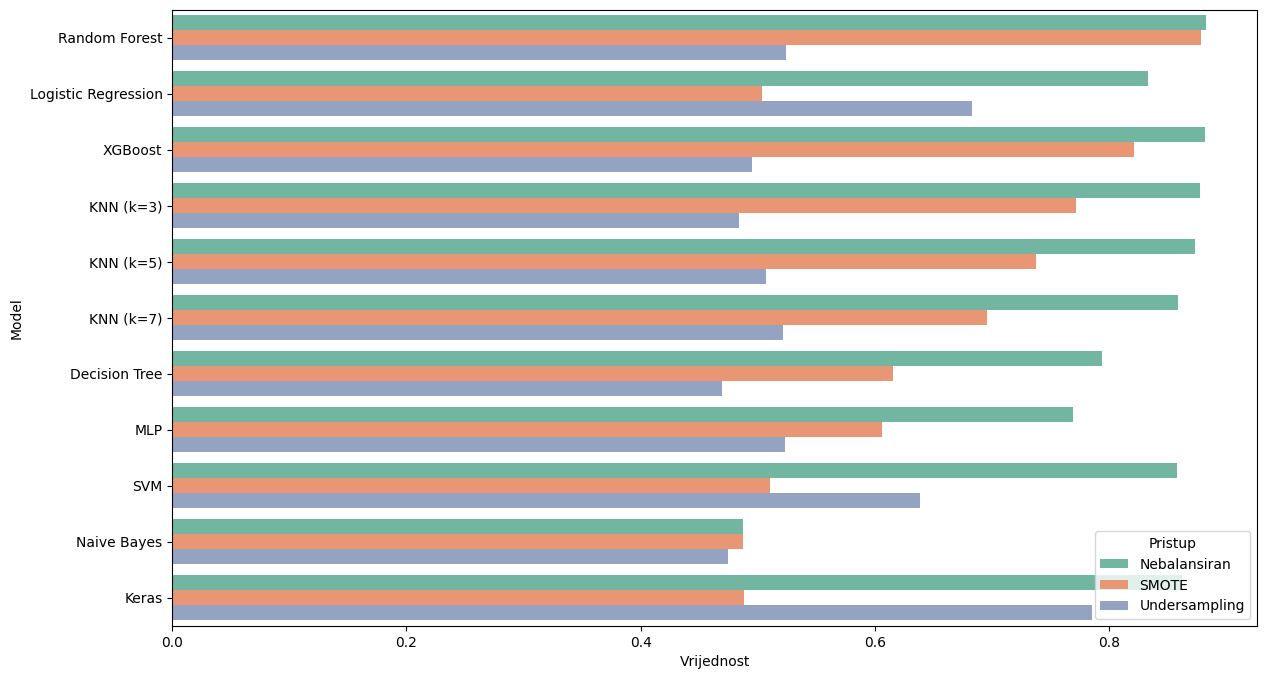

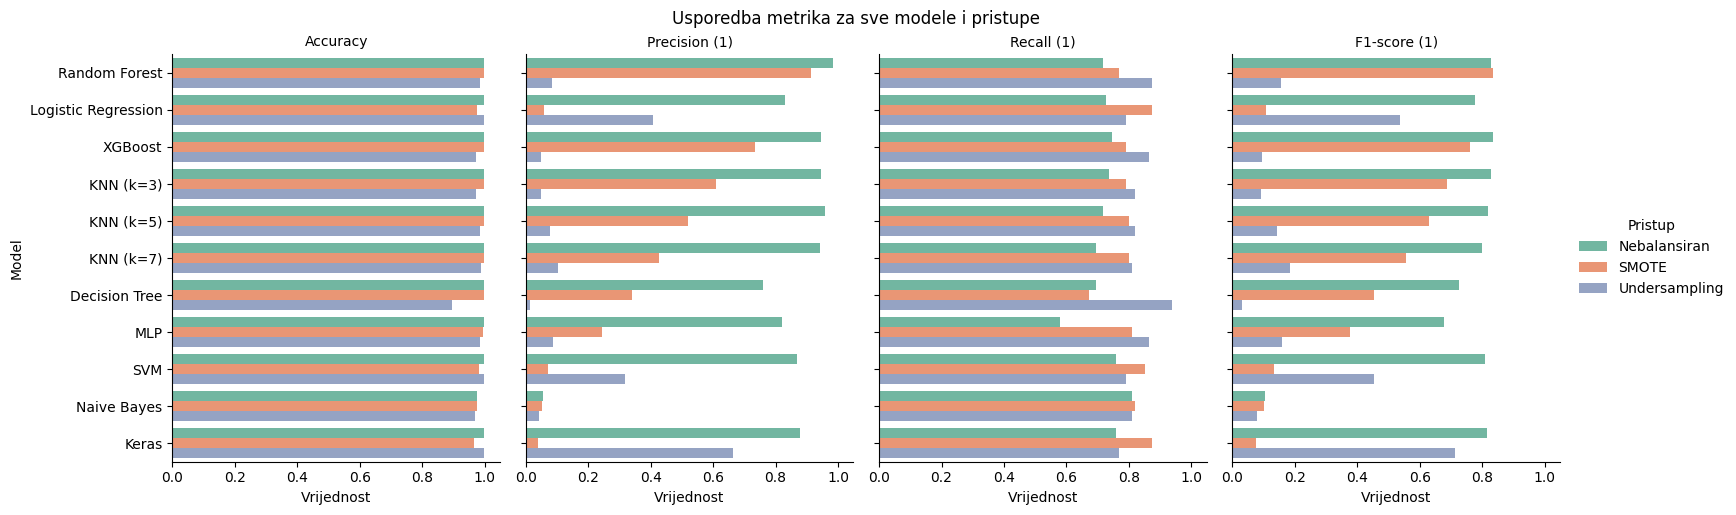

In [ ]:
df_melted = df.melt(
    id_vars=['Model', 'Pristup'],
    value_vars=['Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)'],
    var_name='Metrika',
    value_name='Vrijednost'
)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Vrijednost', y='Model', hue='Pristup', ci=None, palette='Set2', dodge=True)
g = sns.catplot(
    data=df_melted,
    x='Vrijednost', y='Model', hue='Pristup',
    col='Metrika', kind='bar', height=5, aspect=0.8,
    palette='Set2', dodge=True
)

g.set_titles("{col_name}")
g.set_axis_labels("Vrijednost", "Model")
g.fig.suptitle("Usporedba metrika za sve modele i pristupe", y=1.02)
plt.show()